In [1]:
!pip install copick git+https://github.com/copick/copick-utils.git
!pip install -q "monai-weekly[mlflow]"

  Cloning https://github.com/copick/copick-utils.git to /tmp/pip-req-build-k4d5menz
  Running command git clone --filter=blob:none --quiet https://github.com/copick/copick-utils.git /tmp/pip-req-build-k4d5menz
  Resolved https://github.com/copick/copick-utils.git to commit d72192abb2d18dcd0ff8caa749f2327cf24ce894
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.8/704.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import shutil

config_blob = """{
    "name": "czii_cryoet_mlchallenge_2024",
    "description": "2024 CZII CryoET ML Challenge training data.",
    "version": "1.0.0",

    "pickable_objects": [
        {
            "name": "apo-ferritin",
            "is_particle": true,
            "pdb_id": "4V1W",
            "label": 1,
            "color": [  0, 117, 220, 128],
            "radius": 60,
            "map_threshold": 0.0418
        },
        {
            "name": "beta-galactosidase",
            "is_particle": true,
            "pdb_id": "6X1Q",
            "label": 3,
            "color": [ 76,   0,  92, 128],
            "radius": 90,
            "map_threshold": 0.0578
        },
        {
            "name": "ribosome",
            "is_particle": true,
            "pdb_id": "6EK0",
            "label": 4,
            "color": [  0,  92,  49, 128],
            "radius": 150,
            "map_threshold": 0.0374
        },
        {
            "name": "thyroglobulin",
            "is_particle": true,
            "pdb_id": "6SCJ",
            "label": 5,
            "color": [ 43, 206,  72, 128],
            "radius": 130,
            "map_threshold": 0.0278
        },
        {
            "name": "virus-like-particle",
            "is_particle": true,
            "label": 6,
            "color": [255, 204, 153, 128],
            "radius": 135,
            "map_threshold": 0.201
        },
        {
            "name": "membrane",
            "is_particle": false,
            "label": 8,
            "color": [100, 100, 100, 128]
        },
        {
            "name": "background",
            "is_particle": false,
            "label": 9,
            "color": [10, 150, 200, 128]
        }
    ],

    "overlay_root": "/kaggle/working/overlay",

    "overlay_fs_args": {
        "auto_mkdir": true
    },

    "static_root": "/kaggle/input/czii-cryo-et-object-identification/train/static"
}"""

copick_config_path = "/kaggle/working/copick.config"

with open(copick_config_path, "w") as f:
    f.write(config_blob)

source = '/kaggle/input/czii-cryo-et-object-identification/train/overlay'
dest = '/kaggle/working/overlay'

for root, dirs, files in os.walk(source):
    relpath = os.path.relpath(root, source)
    target_dir = os.path.join(dest, relpath)
    os.makedirs(target_dir, exist_ok=True)
    
    for file in files:
        new_filename = f"curation_0_{file}"
        source_file = os.path.join(root, file)
        destination_file = os.path.join(target_dir, new_filename)
        shutil.copy2(os.path.join(root, file), os.path.join(target_dir, new_filename))
        print(f"Copied {source_file} to {destination_file}")

Copied /kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/beta-amylase.json to /kaggle/working/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_beta-amylase.json
Copied /kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/beta-galactosidase.json to /kaggle/working/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_beta-galactosidase.json
Copied /kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/apo-ferritin.json to /kaggle/working/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_apo-ferritin.json
Copied /kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/virus-like-particle.json to /kaggle/working/overlay/ExperimentRuns/TS_86_3/Picks/curation_0_virus-like-particle.json
Copied /kaggle/input/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/TS_86_3/Picks/ribosome.json to /kaggle/working/overlay/ExperimentRuns/TS_86_3/Pic

In [3]:
import copick
import matplotlib.pyplot as plt
import torch
import torchinfo
import numpy as np
import zarr
from tqdm import tqdm
from copick_utils.segmentation.segmentation_from_picks import from_picks, downsample_to_exact_shape
from monai.data import DataLoader, Dataset, CacheDataset, decollate_batch
from monai.transforms import (
    Compose, 
    EnsureChannelFirstd, 
    Orientationd,  
    AsDiscrete,  
    RandFlipd, 
    RandRotate90d, 
    NormalizeIntensityd,
    RandCropByLabelClassesd,
)
from monai.networks.nets import UNet
from monai.losses import DiceLoss, FocalLoss, TverskyLoss
from monai.metrics import DiceMetric, ConfusionMatrixMetric
import mlflow
import mlflow.pytorch

In [4]:
TOMO_TYPES = ['denoised', 'wbp']
LEVELS = ["0"]
VOXEL_SPACING = 10
USER_NAME = 'copickUtils'

In [5]:
# Modified from copick_utils
def segmentation_from_picks(radius, painting_segmentation_name, run, voxel_spacing, tomo_type, pickable_object, pick_set, user_id="paintedPicks", session_id="0"):
    # Fetch the tomogram and determine its multiscale structure
    tomogram = run.get_voxel_spacing(voxel_spacing).get_tomograms(tomo_type)[0]
    if not tomogram:
        raise ValueError("Tomogram not found for the given parameters.")

    # Use copick to create a new segmentation if one does not exist
    segs = run.get_segmentations(user_id=user_id, session_id=session_id, is_multilabel=True, name=painting_segmentation_name, voxel_size=voxel_spacing)
    if len(segs) == 0:
        seg = run.new_segmentation(voxel_spacing, painting_segmentation_name, session_id, True, user_id=user_id)
    else:
        seg = segs[0]

    segmentation_group = zarr.open(seg.zarr(), mode="a")
    highest_res_name = "0"

    # Get the highest resolution dimensions and create a new array if necessary
    tomogram_zarr = zarr.open(tomogram.zarr(), "r")

    highest_res_shape = tomogram_zarr[highest_res_name].shape
    if highest_res_name not in segmentation_group:
        segmentation_group.create(highest_res_name, shape=highest_res_shape, dtype=np.uint16, overwrite=True)

    # Initialize or load the highest resolution array
    highest_res_seg = segmentation_group[highest_res_name][:]

    # Paint picks into the highest resolution array
    highest_res_seg = from_picks(pick_set, highest_res_seg, radius, pickable_object.label, voxel_spacing)

    # Write back the highest resolution data
    segmentation_group[highest_res_name][:] = highest_res_seg

    # Downsample to create lower resolution scales
    multiscale_metadata = tomogram_zarr.attrs.get('multiscales', [{}])[0].get('datasets', [])
    for level_index, level_metadata in enumerate(multiscale_metadata):
        if level_index == 0:
            continue

        level_name = level_metadata.get("path", str(level_index))
        expected_shape = tuple(tomogram_zarr[level_name].shape)

        # Compute scaling factors relative to the highest resolution shape
        scaled_array = downsample_to_exact_shape(highest_res_seg, expected_shape)

        # Create/overwrite the Zarr array for this level
        segmentation_group.create_dataset(level_name, shape=expected_shape, data=scaled_array, dtype=np.uint16, overwrite=True)

        segmentation_group[level_name][:] = scaled_array

    return seg

In [6]:
data = []

root = copick.from_file(copick_config_path)
for run in tqdm(root.runs):
    print(f"\nProcessing run: {run.meta.name}")
    for obj in root.pickable_objects:
        if obj.is_particle:
            print(f"Processing {obj.name} with radius {obj.radius}")
            picks = run.get_picks(object_name=obj.name, user_id="curation")
            if picks:
                seg = segmentation_from_picks(obj.radius, USER_NAME, run, VOXEL_SPACING, TOMO_TYPES[0], obj, picks[0])
                print(f"Created segmentation mask for {obj.name}")
    seg_group = zarr.open_group(seg.path)
    for tomo_type in TOMO_TYPES:
        tomogram = run.get_voxel_spacing(VOXEL_SPACING).get_tomograms(tomo_type)[0]
        zarr_array = zarr.open(tomogram.zarr())
        for level in LEVELS:
            data.append({"image": np.array(zarr_array[level]), "label": np.array(seg_group[level], dtype=np.float32)})

print(len(data))

  0%|          | 0/7 [00:00<?, ?it/s]


Processing run: TS_5_4
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


 14%|█▍        | 1/7 [00:08<00:51,  8.67s/it]


Processing run: TS_69_2
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


 29%|██▊       | 2/7 [00:16<00:40,  8.09s/it]


Processing run: TS_6_4
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


 43%|████▎     | 3/7 [00:23<00:31,  7.77s/it]


Processing run: TS_6_6
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


 57%|█████▋    | 4/7 [00:31<00:22,  7.61s/it]


Processing run: TS_73_6
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


 71%|███████▏  | 5/7 [00:38<00:15,  7.55s/it]


Processing run: TS_86_3
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


 86%|████████▌ | 6/7 [00:45<00:07,  7.51s/it]


Processing run: TS_99_9
Processing apo-ferritin with radius 60.0
Created segmentation mask for apo-ferritin
Processing beta-galactosidase with radius 90.0
Created segmentation mask for beta-galactosidase
Processing ribosome with radius 150.0
Created segmentation mask for ribosome
Processing thyroglobulin with radius 130.0
Created segmentation mask for thyroglobulin
Processing virus-like-particle with radius 135.0
Created segmentation mask for virus-like-particle


100%|██████████| 7/7 [00:53<00:00,  7.59s/it]

14


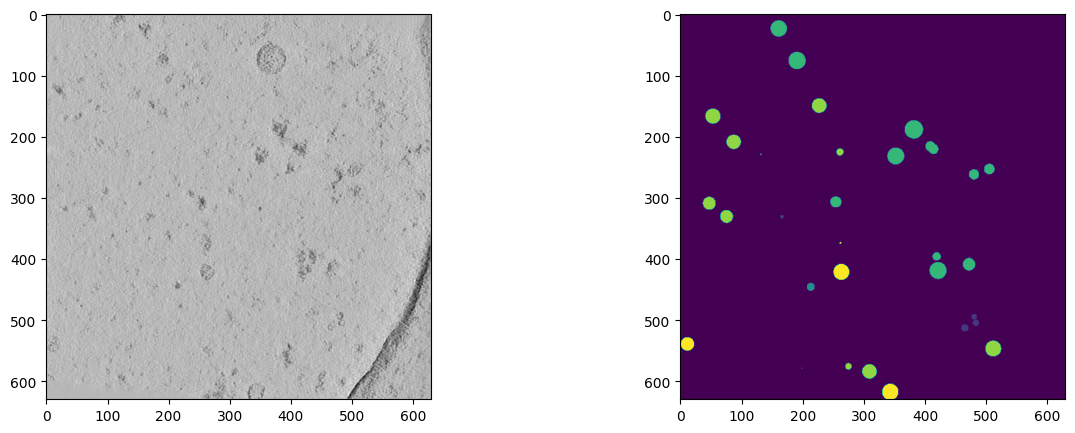

In [7]:
plt.figure(figsize=(15, 5))
z = 100

plt.subplot(1, 2, 1)
plt.imshow(data[0]['image'][z], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(data[0]['label'][z], cmap='viridis')
plt.show()

In [8]:
num_samples = 16
train_batch_size = 1
val_batch_size = 1

train_files, val_files = data[:10], [data[10], data[12]]
print(f"Number of training samples: {len(train_files)}")
print(f"Number of validation samples: {len(val_files)}")

non_random_transforms = Compose([
    EnsureChannelFirstd(keys=["image", "label"], channel_dim="no_channel"),
    NormalizeIntensityd(keys=["image"]),
    Orientationd(keys=["image", "label"], axcodes="RAS")
])
random_transforms = Compose([
    RandCropByLabelClassesd(
        keys=["image", "label"],
        label_key="label",
        spatial_size=[96, 96, 96],
        num_classes=8,
        num_samples=num_samples
    ),
    RandRotate90d(keys=["image", "label"], prob=0.5, spatial_axes=[0, 2]),
    RandFlipd(keys=["image", "label"], prob=0.5, spatial_axis=0),
])
train_ds = CacheDataset(data=train_files, transform=non_random_transforms, cache_rate=1.0)
train_ds = Dataset(data=train_ds, transform=random_transforms)
train_loader = DataLoader(
    train_ds,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=4,
    pin_memory=torch.cuda.is_available()
)

val_ds = CacheDataset(data=val_files, transform=non_random_transforms, cache_rate=1.0)
val_ds = Dataset(data=val_ds, transform=random_transforms)
val_loader = DataLoader(
    val_ds,
    batch_size=val_batch_size,
    num_workers=4,
    pin_memory=torch.cuda.is_available(),
    shuffle=False,
)

Number of training samples: 10
Number of validation samples: 2


Loading dataset: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=len(root.pickable_objects)+1,
    channels=(48, 64, 80, 80),
    strides=(2, 2, 1),
    num_res_units=1,
).to(device)
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr)
loss_function = TverskyLoss(include_background=True, to_onehot_y=True, softmax=True)
dice_metric = DiceMetric(include_background=False, reduction="mean", ignore_empty=True)
recall_metric = ConfusionMatrixMetric(include_background=False, metric_name="recall", reduction="None")

cuda


In [10]:
post_pred = AsDiscrete(argmax=True, to_onehot=len(root.pickable_objects)+1)
post_label = AsDiscrete(to_onehot=len(root.pickable_objects)+1)

def train(train_loader, model, loss_function, metrics_function, optimizer, max_epochs=100):
    val_interval = 2
    best_metric = -1
    best_metric_epoch = -1
    epoch_loss_values = []
    metric_values = []
    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"Epoch {epoch + 1}/{max_epochs}")
        model.train()
        epoch_loss = 0
        step = 0
        for batch_data in train_loader:
            step += 1
            inputs = batch_data["image"].to(device)
            labels = batch_data["label"].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            print(f"Batch {step}/{len(train_ds) // train_loader.batch_size}, train_loss: {loss.item():.4f}")
        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)
        print(f"Epoch {epoch + 1} average loss: {epoch_loss:.4f}")
        mlflow.log_metric("train_loss", epoch_loss, step=epoch+1)
        if (epoch + 1) % val_interval == 0:
            model.eval()
            with torch.no_grad():
                for val_data in val_loader:
                    val_inputs = val_data["image"].to(device)
                    val_labels = val_data["label"].to(device)
                    val_outputs = model(val_inputs)
                    metric_val_outputs = [post_pred(i) for i in decollate_batch(val_outputs)]
                    metric_val_labels = [post_label(i) for i in decollate_batch(val_labels)]
                    metrics_function(y_pred=metric_val_outputs, y=metric_val_labels)

                metrics = metrics_function.aggregate(reduction="mean_batch")
                metric_per_class = ["{:.4g}".format(x) for x in metrics]
                metric = torch.mean(metrics).numpy(force=True)
                mlflow.log_metric("validation metric", metric, step=epoch+1)
                for i,m in enumerate(metrics):
                    mlflow.log_metric(f"Validation metric class {i+1}", m, step=epoch+1)
                metrics_function.reset()

                metric_values.append(metric)
                if metric > best_metric:
                    best_metric = metric
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join('./', "best_metric_model.pth"))
                    
                    print("saved new best metric model")
                print(
                    f"current epoch: {epoch + 1} current mean recall per class: {', '.join(metric_per_class)}"
                    f"\nbest mean recall: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )

In [11]:
from torchinfo import summary

mlflow.end_run()
mlflow.set_experiment('training 3D U-Net model for the cryoET ML Challenge')
epochs = 200
with mlflow.start_run():
    params = {
        "epochs": epochs,
        "learning_rate": lr,
        "loss_function": loss_function.__class__.__name__,
        "metric_function": recall_metric.__class__.__name__,
        "optimizer": "Adam",
    }
    mlflow.log_params(params)

    with open("model_summary.txt", "w") as f:
        f.write(str(summary(model)))
    mlflow.log_artifact("model_summary.txt")

    train(train_loader, model, loss_function, dice_metric, optimizer, max_epochs=epochs)

    mlflow.pytorch.log_model(model, "model")

2024/12/23 23:06:58 INFO mlflow.tracking.fluent: Experiment with name 'training 3D U-Net model for the cryoET ML Challenge' does not exist. Creating a new experiment.


----------
Epoch 1/200


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/p

Batch 1/10, train_loss: 0.9679
Batch 2/10, train_loss: 0.9595
Batch 3/10, train_loss: 0.9540
Batch 4/10, train_loss: 0.9456
Batch 5/10, train_loss: 0.9403
Batch 6/10, train_loss: 0.9394
Batch 7/10, train_loss: 0.9352
Batch 8/10, train_loss: 0.9245
Batch 9/10, train_loss: 0.9206
Batch 10/10, train_loss: 0.9207
Epoch 1 average loss: 0.9408
----------
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.9151
Batch 2/10, train_loss: 0.9191
Batch 3/10, train_loss: 0.9177
Batch 4/10, train_loss: 0.9129
Batch 5/10, train_loss: 0.9084
Batch 6/10, train_loss: 0.8981
Batch 7/10, train_loss: 0.8917
Batch 8/10, train_loss: 0.8977
Batch 9/10, train_loss: 0.8960
Batch 10/10, train_loss: 0.8893
Epoch 2 average loss: 0.9046


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 2 current mean recall per class: 0.008182, 0, 0.002962, 0.3459, 0.01187, 0.1361, 0
best mean recall: 0.0721 at epoch: 2
----------
Epoch 3/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8895
Batch 2/10, train_loss: 0.8892
Batch 3/10, train_loss: 0.8826
Batch 4/10, train_loss: 0.8768
Batch 5/10, train_loss: 0.8739
Batch 6/10, train_loss: 0.8649
Batch 7/10, train_loss: 0.8694
Batch 8/10, train_loss: 0.8819
Batch 9/10, train_loss: 0.8767
Batch 10/10, train_loss: 0.8743
Epoch 3 average loss: 0.8779
----------
Epoch 4/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8584
Batch 2/10, train_loss: 0.8659
Batch 3/10, train_loss: 0.8584
Batch 4/10, train_loss: 0.8685
Batch 5/10, train_loss: 0.8529
Batch 6/10, train_loss: 0.8553
Batch 7/10, train_loss: 0.8524
Batch 8/10, train_loss: 0.8625
Batch 9/10, train_loss: 0.8526
Batch 10/10, train_loss: 0.8522
Epoch 4 average loss: 0.8579


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 4 current mean recall per class: 0.01411, 0, 4.109e-05, 0.4507, 0.001378, 0.1492, 0
best mean recall: 0.0879 at epoch: 4
----------
Epoch 5/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8239
Batch 2/10, train_loss: 0.8514
Batch 3/10, train_loss: 0.8528
Batch 4/10, train_loss: 0.8413
Batch 5/10, train_loss: 0.8609
Batch 6/10, train_loss: 0.8473
Batch 7/10, train_loss: 0.8450
Batch 8/10, train_loss: 0.8397
Batch 9/10, train_loss: 0.8412
Batch 10/10, train_loss: 0.8420
Epoch 5 average loss: 0.8445
----------
Epoch 6/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8404
Batch 2/10, train_loss: 0.8503
Batch 3/10, train_loss: 0.8399
Batch 4/10, train_loss: 0.8404
Batch 5/10, train_loss: 0.8419
Batch 6/10, train_loss: 0.8363
Batch 7/10, train_loss: 0.8380
Batch 8/10, train_loss: 0.8289
Batch 9/10, train_loss: 0.8397
Batch 10/10, train_loss: 0.8258
Epoch 6 average loss: 0.8382


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 6 current mean recall per class: 0.04378, 0, 0.0002139, 0.4372, 0.03794, 0.1724, 0
best mean recall: 0.0988 at epoch: 6
----------
Epoch 7/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8183
Batch 2/10, train_loss: 0.8257
Batch 3/10, train_loss: 0.8270
Batch 4/10, train_loss: 0.8274
Batch 5/10, train_loss: 0.8338
Batch 6/10, train_loss: 0.8320
Batch 7/10, train_loss: 0.8417
Batch 8/10, train_loss: 0.8221
Batch 9/10, train_loss: 0.8438
Batch 10/10, train_loss: 0.8432
Epoch 7 average loss: 0.8315
----------
Epoch 8/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8307
Batch 2/10, train_loss: 0.8316
Batch 3/10, train_loss: 0.8316
Batch 4/10, train_loss: 0.8181
Batch 5/10, train_loss: 0.8355
Batch 6/10, train_loss: 0.8366
Batch 7/10, train_loss: 0.8377
Batch 8/10, train_loss: 0.8320
Batch 9/10, train_loss: 0.8236
Batch 10/10, train_loss: 0.8295
Epoch 8 average loss: 0.8307


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 8 current mean recall per class: 0.0661, 0, 0.004926, 0.3868, 0.07678, 0.1764, 0
best mean recall: 0.1016 at epoch: 8
----------
Epoch 9/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8211
Batch 2/10, train_loss: 0.8192
Batch 3/10, train_loss: 0.8335
Batch 4/10, train_loss: 0.8200
Batch 5/10, train_loss: 0.8319
Batch 6/10, train_loss: 0.8190
Batch 7/10, train_loss: 0.8209
Batch 8/10, train_loss: 0.8277
Batch 9/10, train_loss: 0.8220
Batch 10/10, train_loss: 0.8414
Epoch 9 average loss: 0.8257
----------
Epoch 10/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8263
Batch 2/10, train_loss: 0.8151
Batch 3/10, train_loss: 0.8243
Batch 4/10, train_loss: 0.8188
Batch 5/10, train_loss: 0.8387
Batch 6/10, train_loss: 0.8217
Batch 7/10, train_loss: 0.8294
Batch 8/10, train_loss: 0.8270
Batch 9/10, train_loss: 0.8254
Batch 10/10, train_loss: 0.8102
Epoch 10 average loss: 0.8237


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 10 current mean recall per class: 0.02995, 0, 0.03013, 0.307, 0.09262, 0.1135, 0
best mean recall: 0.1016 at epoch: 8
----------
Epoch 11/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8306
Batch 2/10, train_loss: 0.8269
Batch 3/10, train_loss: 0.8205
Batch 4/10, train_loss: 0.8188
Batch 5/10, train_loss: 0.8075
Batch 6/10, train_loss: 0.8219
Batch 7/10, train_loss: 0.8347
Batch 8/10, train_loss: 0.8363
Batch 9/10, train_loss: 0.8189
Batch 10/10, train_loss: 0.8382
Epoch 11 average loss: 0.8254
----------
Epoch 12/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8333
Batch 2/10, train_loss: 0.8195
Batch 3/10, train_loss: 0.8287
Batch 4/10, train_loss: 0.8136
Batch 5/10, train_loss: 0.8270
Batch 6/10, train_loss: 0.8358
Batch 7/10, train_loss: 0.8091
Batch 8/10, train_loss: 0.8285
Batch 9/10, train_loss: 0.8176
Batch 10/10, train_loss: 0.8131
Epoch 12 average loss: 0.8226


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 12 current mean recall per class: 0.0484, 0, 0.09379, 0.4584, 0.09747, 0.1806, 0
best mean recall: 0.1255 at epoch: 12
----------
Epoch 13/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8171
Batch 2/10, train_loss: 0.8023
Batch 3/10, train_loss: 0.8129
Batch 4/10, train_loss: 0.8192
Batch 5/10, train_loss: 0.8183
Batch 6/10, train_loss: 0.8330
Batch 7/10, train_loss: 0.8151
Batch 8/10, train_loss: 0.8107
Batch 9/10, train_loss: 0.8220
Batch 10/10, train_loss: 0.8184
Epoch 13 average loss: 0.8169
----------
Epoch 14/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8314
Batch 2/10, train_loss: 0.8095
Batch 3/10, train_loss: 0.8172
Batch 4/10, train_loss: 0.8126
Batch 5/10, train_loss: 0.8125
Batch 6/10, train_loss: 0.8142
Batch 7/10, train_loss: 0.8155
Batch 8/10, train_loss: 0.8090
Batch 9/10, train_loss: 0.8265
Batch 10/10, train_loss: 0.8124
Epoch 14 average loss: 0.8161


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 14 current mean recall per class: 0.0583, 0, 0.08481, 0.4371, 0.1665, 0.1659, 0
best mean recall: 0.1304 at epoch: 14
----------
Epoch 15/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8454
Batch 2/10, train_loss: 0.8169
Batch 3/10, train_loss: 0.8127
Batch 4/10, train_loss: 0.8049
Batch 5/10, train_loss: 0.8255
Batch 6/10, train_loss: 0.8259
Batch 7/10, train_loss: 0.8173
Batch 8/10, train_loss: 0.8060
Batch 9/10, train_loss: 0.8162
Batch 10/10, train_loss: 0.8335
Epoch 15 average loss: 0.8204
----------
Epoch 16/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8304
Batch 2/10, train_loss: 0.8218
Batch 3/10, train_loss: 0.8263
Batch 4/10, train_loss: 0.8261
Batch 5/10, train_loss: 0.8140
Batch 6/10, train_loss: 0.8158
Batch 7/10, train_loss: 0.8093
Batch 8/10, train_loss: 0.8110
Batch 9/10, train_loss: 0.8184
Batch 10/10, train_loss: 0.8135
Epoch 16 average loss: 0.8187


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 16 current mean recall per class: 0.05334, 0, 0.1084, 0.5094, 0.1654, 0.09445, 0
best mean recall: 0.1330 at epoch: 16
----------
Epoch 17/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8013
Batch 2/10, train_loss: 0.8244
Batch 3/10, train_loss: 0.7940
Batch 4/10, train_loss: 0.8145
Batch 5/10, train_loss: 0.7773
Batch 6/10, train_loss: 0.8315
Batch 7/10, train_loss: 0.8191
Batch 8/10, train_loss: 0.8090
Batch 9/10, train_loss: 0.8232
Batch 10/10, train_loss: 0.8207
Epoch 17 average loss: 0.8115
----------
Epoch 18/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8086
Batch 2/10, train_loss: 0.8147
Batch 3/10, train_loss: 0.8222
Batch 4/10, train_loss: 0.8163
Batch 5/10, train_loss: 0.8113
Batch 6/10, train_loss: 0.8170
Batch 7/10, train_loss: 0.8050
Batch 8/10, train_loss: 0.8239
Batch 9/10, train_loss: 0.8281
Batch 10/10, train_loss: 0.8158
Epoch 18 average loss: 0.8163


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 18 current mean recall per class: 0.06727, 0, 0.09189, 0.3012, 0.1502, 0.2615, 0
best mean recall: 0.1330 at epoch: 16
----------
Epoch 19/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8014
Batch 2/10, train_loss: 0.8178
Batch 3/10, train_loss: 0.7996
Batch 4/10, train_loss: 0.8140
Batch 5/10, train_loss: 0.8059
Batch 6/10, train_loss: 0.8036
Batch 7/10, train_loss: 0.8084
Batch 8/10, train_loss: 0.7970
Batch 9/10, train_loss: 0.8026
Batch 10/10, train_loss: 0.7993
Epoch 19 average loss: 0.8050
----------
Epoch 20/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8141
Batch 2/10, train_loss: 0.8045
Batch 3/10, train_loss: 0.8154
Batch 4/10, train_loss: 0.8232
Batch 5/10, train_loss: 0.8086
Batch 6/10, train_loss: 0.7998
Batch 7/10, train_loss: 0.8166
Batch 8/10, train_loss: 0.7996
Batch 9/10, train_loss: 0.8191
Batch 10/10, train_loss: 0.7849
Epoch 20 average loss: 0.8086


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 20 current mean recall per class: 0.06674, 0, 0.1348, 0.472, 0.1739, 0.2726, 0
best mean recall: 0.1600 at epoch: 20
----------
Epoch 21/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7875
Batch 2/10, train_loss: 0.8269
Batch 3/10, train_loss: 0.8021
Batch 4/10, train_loss: 0.8149
Batch 5/10, train_loss: 0.8052
Batch 6/10, train_loss: 0.7993
Batch 7/10, train_loss: 0.7727
Batch 8/10, train_loss: 0.7793
Batch 9/10, train_loss: 0.7873
Batch 10/10, train_loss: 0.7919
Epoch 21 average loss: 0.7967
----------
Epoch 22/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7822
Batch 2/10, train_loss: 0.8028
Batch 3/10, train_loss: 0.7969
Batch 4/10, train_loss: 0.7872
Batch 5/10, train_loss: 0.7948
Batch 6/10, train_loss: 0.8096
Batch 7/10, train_loss: 0.8119
Batch 8/10, train_loss: 0.8180
Batch 9/10, train_loss: 0.7931
Batch 10/10, train_loss: 0.8055
Epoch 22 average loss: 0.8002


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 22 current mean recall per class: 0.1064, 0, 0.1381, 0.4469, 0.1941, 0.394, 0
best mean recall: 0.1828 at epoch: 22
----------
Epoch 23/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7874
Batch 2/10, train_loss: 0.7976
Batch 3/10, train_loss: 0.8067
Batch 4/10, train_loss: 0.7905
Batch 5/10, train_loss: 0.8041
Batch 6/10, train_loss: 0.8057
Batch 7/10, train_loss: 0.7819
Batch 8/10, train_loss: 0.7834
Batch 9/10, train_loss: 0.8125
Batch 10/10, train_loss: 0.7835
Epoch 23 average loss: 0.7953
----------
Epoch 24/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7938
Batch 2/10, train_loss: 0.7828
Batch 3/10, train_loss: 0.7822
Batch 4/10, train_loss: 0.8036
Batch 5/10, train_loss: 0.7955
Batch 6/10, train_loss: 0.8148
Batch 7/10, train_loss: 0.8131
Batch 8/10, train_loss: 0.7888
Batch 9/10, train_loss: 0.7959
Batch 10/10, train_loss: 0.7901
Epoch 24 average loss: 0.7961


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 24 current mean recall per class: 0.1515, 0, 0.1315, 0.4547, 0.1914, 0.2404, 0
best mean recall: 0.1828 at epoch: 22
----------
Epoch 25/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7909
Batch 2/10, train_loss: 0.7826
Batch 3/10, train_loss: 0.8161
Batch 4/10, train_loss: 0.7992
Batch 5/10, train_loss: 0.7935
Batch 6/10, train_loss: 0.8128
Batch 7/10, train_loss: 0.7916
Batch 8/10, train_loss: 0.7923
Batch 9/10, train_loss: 0.7912
Batch 10/10, train_loss: 0.7750
Epoch 25 average loss: 0.7945
----------
Epoch 26/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8006
Batch 2/10, train_loss: 0.7766
Batch 3/10, train_loss: 0.7747
Batch 4/10, train_loss: 0.7904
Batch 5/10, train_loss: 0.7906
Batch 6/10, train_loss: 0.7840
Batch 7/10, train_loss: 0.8096
Batch 8/10, train_loss: 0.7815
Batch 9/10, train_loss: 0.7871
Batch 10/10, train_loss: 0.7835
Epoch 26 average loss: 0.7879


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 26 current mean recall per class: 0.08356, 0, 0.1477, 0.4619, 0.2314, 0.4345, 0
best mean recall: 0.1941 at epoch: 26
----------
Epoch 27/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8187
Batch 2/10, train_loss: 0.7807
Batch 3/10, train_loss: 0.7674
Batch 4/10, train_loss: 0.7894
Batch 5/10, train_loss: 0.8082
Batch 6/10, train_loss: 0.8042
Batch 7/10, train_loss: 0.7971
Batch 8/10, train_loss: 0.7988
Batch 9/10, train_loss: 0.7703
Batch 10/10, train_loss: 0.7628
Epoch 27 average loss: 0.7898
----------
Epoch 28/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7860
Batch 2/10, train_loss: 0.7973
Batch 3/10, train_loss: 0.7811
Batch 4/10, train_loss: 0.7846
Batch 5/10, train_loss: 0.7957
Batch 6/10, train_loss: 0.8012
Batch 7/10, train_loss: 0.8008
Batch 8/10, train_loss: 0.8050
Batch 9/10, train_loss: 0.7814
Batch 10/10, train_loss: 0.7569
Epoch 28 average loss: 0.7890


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 28 current mean recall per class: 0.1673, 0, 0.1797, 0.4269, 0.1952, 0.3271, 0
best mean recall: 0.1941 at epoch: 26
----------
Epoch 29/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8014
Batch 2/10, train_loss: 0.7748
Batch 3/10, train_loss: 0.7809
Batch 4/10, train_loss: 0.7854
Batch 5/10, train_loss: 0.7642
Batch 6/10, train_loss: 0.7919
Batch 7/10, train_loss: 0.7762
Batch 8/10, train_loss: 0.7904
Batch 9/10, train_loss: 0.7897
Batch 10/10, train_loss: 0.8028
Epoch 29 average loss: 0.7858
----------
Epoch 30/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7728
Batch 2/10, train_loss: 0.7751
Batch 3/10, train_loss: 0.7987
Batch 4/10, train_loss: 0.8000
Batch 5/10, train_loss: 0.7710
Batch 6/10, train_loss: 0.7959
Batch 7/10, train_loss: 0.7607
Batch 8/10, train_loss: 0.7820
Batch 9/10, train_loss: 0.7939
Batch 10/10, train_loss: 0.7881
Epoch 30 average loss: 0.7838


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 30 current mean recall per class: 0.1388, 0, 0.1276, 0.4468, 0.2623, 0.2892, 0
best mean recall: 0.1941 at epoch: 26
----------
Epoch 31/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7735
Batch 2/10, train_loss: 0.7728
Batch 3/10, train_loss: 0.7723
Batch 4/10, train_loss: 0.8103
Batch 5/10, train_loss: 0.8013
Batch 6/10, train_loss: 0.7858
Batch 7/10, train_loss: 0.7842
Batch 8/10, train_loss: 0.8078
Batch 9/10, train_loss: 0.7855
Batch 10/10, train_loss: 0.7804
Epoch 31 average loss: 0.7874
----------
Epoch 32/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7498
Batch 2/10, train_loss: 0.7859
Batch 3/10, train_loss: 0.7652
Batch 4/10, train_loss: 0.7972
Batch 5/10, train_loss: 0.7981
Batch 6/10, train_loss: 0.7880
Batch 7/10, train_loss: 0.7954
Batch 8/10, train_loss: 0.8093
Batch 9/10, train_loss: 0.7862
Batch 10/10, train_loss: 0.7971
Epoch 32 average loss: 0.7872


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 32 current mean recall per class: 0.08639, 0, 0.05951, 0.4887, 0.1646, 0.373, 0
best mean recall: 0.1941 at epoch: 26
----------
Epoch 33/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7998
Batch 2/10, train_loss: 0.7701
Batch 3/10, train_loss: 0.8018
Batch 4/10, train_loss: 0.7875
Batch 5/10, train_loss: 0.7648
Batch 6/10, train_loss: 0.7953
Batch 7/10, train_loss: 0.8000
Batch 8/10, train_loss: 0.7640
Batch 9/10, train_loss: 0.8111
Batch 10/10, train_loss: 0.8017
Epoch 33 average loss: 0.7896
----------
Epoch 34/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8018
Batch 2/10, train_loss: 0.7927
Batch 3/10, train_loss: 0.7941
Batch 4/10, train_loss: 0.7780
Batch 5/10, train_loss: 0.7886
Batch 6/10, train_loss: 0.7676
Batch 7/10, train_loss: 0.7485
Batch 8/10, train_loss: 0.7824
Batch 9/10, train_loss: 0.7696
Batch 10/10, train_loss: 0.7902
Epoch 34 average loss: 0.7814


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 34 current mean recall per class: 0.1729, 0, 0.1994, 0.5156, 0.2355, 0.3727, 0
best mean recall: 0.2137 at epoch: 34
----------
Epoch 35/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7681
Batch 2/10, train_loss: 0.7673
Batch 3/10, train_loss: 0.7920
Batch 4/10, train_loss: 0.7700
Batch 5/10, train_loss: 0.7670
Batch 6/10, train_loss: 0.7409
Batch 7/10, train_loss: 0.7670
Batch 8/10, train_loss: 0.7531
Batch 9/10, train_loss: 0.7827
Batch 10/10, train_loss: 0.8005
Epoch 35 average loss: 0.7709
----------
Epoch 36/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.8045
Batch 2/10, train_loss: 0.7894
Batch 3/10, train_loss: 0.7735
Batch 4/10, train_loss: 0.7641
Batch 5/10, train_loss: 0.7697
Batch 6/10, train_loss: 0.7790
Batch 7/10, train_loss: 0.7624
Batch 8/10, train_loss: 0.7781
Batch 9/10, train_loss: 0.7647
Batch 10/10, train_loss: 0.7999
Epoch 36 average loss: 0.7785


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 36 current mean recall per class: 0.1536, 0, 0.2191, 0.5122, 0.2069, 0.3518, 0
best mean recall: 0.2137 at epoch: 34
----------
Epoch 37/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7696
Batch 2/10, train_loss: 0.7797
Batch 3/10, train_loss: 0.7879
Batch 4/10, train_loss: 0.7751
Batch 5/10, train_loss: 0.7956
Batch 6/10, train_loss: 0.7931
Batch 7/10, train_loss: 0.7929
Batch 8/10, train_loss: 0.7516
Batch 9/10, train_loss: 0.8106
Batch 10/10, train_loss: 0.7880
Epoch 37 average loss: 0.7844
----------
Epoch 38/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7729
Batch 2/10, train_loss: 0.7661
Batch 3/10, train_loss: 0.7933
Batch 4/10, train_loss: 0.7672
Batch 5/10, train_loss: 0.7667
Batch 6/10, train_loss: 0.8082
Batch 7/10, train_loss: 0.7644
Batch 8/10, train_loss: 0.7397
Batch 9/10, train_loss: 0.7831
Batch 10/10, train_loss: 0.7805
Epoch 38 average loss: 0.7742


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 38 current mean recall per class: 0.249, 0, 0.2041, 0.5252, 0.2744, 0.3322, 0
best mean recall: 0.2264 at epoch: 38
----------
Epoch 39/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7938
Batch 2/10, train_loss: 0.7804
Batch 3/10, train_loss: 0.7685
Batch 4/10, train_loss: 0.7550
Batch 5/10, train_loss: 0.7667
Batch 6/10, train_loss: 0.7908
Batch 7/10, train_loss: 0.7649
Batch 8/10, train_loss: 0.7684
Batch 9/10, train_loss: 0.7632
Batch 10/10, train_loss: 0.7782
Epoch 39 average loss: 0.7730
----------
Epoch 40/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7494
Batch 2/10, train_loss: 0.8025
Batch 3/10, train_loss: 0.7709
Batch 4/10, train_loss: 0.7996
Batch 5/10, train_loss: 0.7985
Batch 6/10, train_loss: 0.7828
Batch 7/10, train_loss: 0.7770
Batch 8/10, train_loss: 0.7809
Batch 9/10, train_loss: 0.7603
Batch 10/10, train_loss: 0.7617
Epoch 40 average loss: 0.7783


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 40 current mean recall per class: 0.1512, 0, 0.1814, 0.4069, 0.2768, 0.366, 0
best mean recall: 0.2264 at epoch: 38
----------
Epoch 41/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7715
Batch 2/10, train_loss: 0.8099
Batch 3/10, train_loss: 0.7806
Batch 4/10, train_loss: 0.7703
Batch 5/10, train_loss: 0.7864
Batch 6/10, train_loss: 0.7820
Batch 7/10, train_loss: 0.7778
Batch 8/10, train_loss: 0.7840
Batch 9/10, train_loss: 0.7857
Batch 10/10, train_loss: 0.7910
Epoch 41 average loss: 0.7839
----------
Epoch 42/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7457
Batch 2/10, train_loss: 0.7598
Batch 3/10, train_loss: 0.7832
Batch 4/10, train_loss: 0.7704
Batch 5/10, train_loss: 0.7825
Batch 6/10, train_loss: 0.7798
Batch 7/10, train_loss: 0.7754
Batch 8/10, train_loss: 0.7561
Batch 9/10, train_loss: 0.7803
Batch 10/10, train_loss: 0.7694
Epoch 42 average loss: 0.7703


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 42 current mean recall per class: 0.1946, 0, 0.2743, 0.5605, 0.1606, 0.2501, 0
best mean recall: 0.2264 at epoch: 38
----------
Epoch 43/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7932
Batch 2/10, train_loss: 0.7819
Batch 3/10, train_loss: 0.7640
Batch 4/10, train_loss: 0.7656
Batch 5/10, train_loss: 0.7821
Batch 6/10, train_loss: 0.7998
Batch 7/10, train_loss: 0.7752
Batch 8/10, train_loss: 0.7830
Batch 9/10, train_loss: 0.7878
Batch 10/10, train_loss: 0.7782
Epoch 43 average loss: 0.7811
----------
Epoch 44/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7763
Batch 2/10, train_loss: 0.7464
Batch 3/10, train_loss: 0.7969
Batch 4/10, train_loss: 0.7831
Batch 5/10, train_loss: 0.7800
Batch 6/10, train_loss: 0.7783
Batch 7/10, train_loss: 0.7855
Batch 8/10, train_loss: 0.7560
Batch 9/10, train_loss: 0.7726
Batch 10/10, train_loss: 0.7337
Epoch 44 average loss: 0.7709


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 44 current mean recall per class: 0.2041, 0, 0.2127, 0.5073, 0.2244, 0.366, 0
best mean recall: 0.2264 at epoch: 38
----------
Epoch 45/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7638
Batch 2/10, train_loss: 0.8038
Batch 3/10, train_loss: 0.7583
Batch 4/10, train_loss: 0.7905
Batch 5/10, train_loss: 0.7597
Batch 6/10, train_loss: 0.7550
Batch 7/10, train_loss: 0.7735
Batch 8/10, train_loss: 0.7451
Batch 9/10, train_loss: 0.7599
Batch 10/10, train_loss: 0.7756
Epoch 45 average loss: 0.7685
----------
Epoch 46/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7706
Batch 2/10, train_loss: 0.7508
Batch 3/10, train_loss: 0.7597
Batch 4/10, train_loss: 0.7564
Batch 5/10, train_loss: 0.7658
Batch 6/10, train_loss: 0.7506
Batch 7/10, train_loss: 0.7681
Batch 8/10, train_loss: 0.7444
Batch 9/10, train_loss: 0.7648
Batch 10/10, train_loss: 0.7723
Epoch 46 average loss: 0.7603


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 46 current mean recall per class: 0.195, 0, 0.2521, 0.5729, 0.2427, 0.3326, 0
best mean recall: 0.2279 at epoch: 46
----------
Epoch 47/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7968
Batch 2/10, train_loss: 0.7823
Batch 3/10, train_loss: 0.7913
Batch 4/10, train_loss: 0.7582
Batch 5/10, train_loss: 0.8093
Batch 6/10, train_loss: 0.7978
Batch 7/10, train_loss: 0.7610
Batch 8/10, train_loss: 0.7483
Batch 9/10, train_loss: 0.7582
Batch 10/10, train_loss: 0.7981
Epoch 47 average loss: 0.7801
----------
Epoch 48/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7652
Batch 2/10, train_loss: 0.7753
Batch 3/10, train_loss: 0.8015
Batch 4/10, train_loss: 0.7984
Batch 5/10, train_loss: 0.7605
Batch 6/10, train_loss: 0.7548
Batch 7/10, train_loss: 0.7911
Batch 8/10, train_loss: 0.7662
Batch 9/10, train_loss: 0.7879
Batch 10/10, train_loss: 0.7804
Epoch 48 average loss: 0.7781


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 48 current mean recall per class: 0.2038, 0, 0.3157, 0.5149, 0.2585, 0.3544, 0
best mean recall: 0.2353 at epoch: 48
----------
Epoch 49/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7343
Batch 2/10, train_loss: 0.7486
Batch 3/10, train_loss: 0.7469
Batch 4/10, train_loss: 0.7647
Batch 5/10, train_loss: 0.7829
Batch 6/10, train_loss: 0.7809
Batch 7/10, train_loss: 0.7901
Batch 8/10, train_loss: 0.7696
Batch 9/10, train_loss: 0.7879
Batch 10/10, train_loss: 0.7643
Epoch 49 average loss: 0.7670
----------
Epoch 50/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7533
Batch 2/10, train_loss: 0.7493
Batch 3/10, train_loss: 0.7518
Batch 4/10, train_loss: 0.8005
Batch 5/10, train_loss: 0.7607
Batch 6/10, train_loss: 0.7712
Batch 7/10, train_loss: 0.7779
Batch 8/10, train_loss: 0.7524
Batch 9/10, train_loss: 0.7645
Batch 10/10, train_loss: 0.7533
Epoch 50 average loss: 0.7635


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 50 current mean recall per class: 0.2336, 0, 0.2354, 0.5886, 0.2327, 0.3625, 0
best mean recall: 0.2361 at epoch: 50
----------
Epoch 51/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7547
Batch 2/10, train_loss: 0.7700
Batch 3/10, train_loss: 0.7232
Batch 4/10, train_loss: 0.7754
Batch 5/10, train_loss: 0.7686
Batch 6/10, train_loss: 0.7758
Batch 7/10, train_loss: 0.7589
Batch 8/10, train_loss: 0.7862
Batch 9/10, train_loss: 0.7763
Batch 10/10, train_loss: 0.7661
Epoch 51 average loss: 0.7655
----------
Epoch 52/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7519
Batch 2/10, train_loss: 0.7738
Batch 3/10, train_loss: 0.7709
Batch 4/10, train_loss: 0.7808
Batch 5/10, train_loss: 0.7568
Batch 6/10, train_loss: 0.7618
Batch 7/10, train_loss: 0.8002
Batch 8/10, train_loss: 0.7694
Batch 9/10, train_loss: 0.7801
Batch 10/10, train_loss: 0.7421
Epoch 52 average loss: 0.7688


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 52 current mean recall per class: 0.2807, 0, 0.3245, 0.5331, 0.2943, 0.353, 0
best mean recall: 0.2551 at epoch: 52
----------
Epoch 53/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7437
Batch 2/10, train_loss: 0.7876
Batch 3/10, train_loss: 0.7500
Batch 4/10, train_loss: 0.7864
Batch 5/10, train_loss: 0.7263
Batch 6/10, train_loss: 0.7560
Batch 7/10, train_loss: 0.7422
Batch 8/10, train_loss: 0.7703
Batch 9/10, train_loss: 0.7623
Batch 10/10, train_loss: 0.7544
Epoch 53 average loss: 0.7579
----------
Epoch 54/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7793
Batch 2/10, train_loss: 0.7475
Batch 3/10, train_loss: 0.7628
Batch 4/10, train_loss: 0.7443
Batch 5/10, train_loss: 0.7550
Batch 6/10, train_loss: 0.7565
Batch 7/10, train_loss: 0.7843
Batch 8/10, train_loss: 0.7623
Batch 9/10, train_loss: 0.7321
Batch 10/10, train_loss: 0.7548
Epoch 54 average loss: 0.7579


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 54 current mean recall per class: 0.3435, 0, 0.248, 0.5219, 0.3097, 0.4359, 0
best mean recall: 0.2656 at epoch: 54
----------
Epoch 55/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7421
Batch 2/10, train_loss: 0.7748
Batch 3/10, train_loss: 0.7388
Batch 4/10, train_loss: 0.7809
Batch 5/10, train_loss: 0.7750
Batch 6/10, train_loss: 0.7790
Batch 7/10, train_loss: 0.7462
Batch 8/10, train_loss: 0.7490
Batch 9/10, train_loss: 0.7760
Batch 10/10, train_loss: 0.7815
Epoch 55 average loss: 0.7643
----------
Epoch 56/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7728
Batch 2/10, train_loss: 0.7923
Batch 3/10, train_loss: 0.7616
Batch 4/10, train_loss: 0.7852
Batch 5/10, train_loss: 0.7586
Batch 6/10, train_loss: 0.7758
Batch 7/10, train_loss: 0.7651
Batch 8/10, train_loss: 0.7760
Batch 9/10, train_loss: 0.7484
Batch 10/10, train_loss: 0.7635
Epoch 56 average loss: 0.7699


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 56 current mean recall per class: 0.2107, 0, 0.1294, 0.5368, 0.2202, 0.4037, 0
best mean recall: 0.2656 at epoch: 54
----------
Epoch 57/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7599
Batch 2/10, train_loss: 0.7650
Batch 3/10, train_loss: 0.7509
Batch 4/10, train_loss: 0.7607
Batch 5/10, train_loss: 0.7518
Batch 6/10, train_loss: 0.7722
Batch 7/10, train_loss: 0.7562
Batch 8/10, train_loss: 0.7599
Batch 9/10, train_loss: 0.7677
Batch 10/10, train_loss: 0.7611
Epoch 57 average loss: 0.7605
----------
Epoch 58/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7824
Batch 2/10, train_loss: 0.7395
Batch 3/10, train_loss: 0.7513
Batch 4/10, train_loss: 0.7229
Batch 5/10, train_loss: 0.7462
Batch 6/10, train_loss: 0.7709
Batch 7/10, train_loss: 0.7832
Batch 8/10, train_loss: 0.7553
Batch 9/10, train_loss: 0.7385
Batch 10/10, train_loss: 0.7313
Epoch 58 average loss: 0.7522


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 58 current mean recall per class: 0.2936, 0, 0.1848, 0.5178, 0.2513, 0.4317, 0
best mean recall: 0.2656 at epoch: 54
----------
Epoch 59/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7723
Batch 2/10, train_loss: 0.7413
Batch 3/10, train_loss: 0.7531
Batch 4/10, train_loss: 0.7600
Batch 5/10, train_loss: 0.7763
Batch 6/10, train_loss: 0.7541
Batch 7/10, train_loss: 0.7719
Batch 8/10, train_loss: 0.7377
Batch 9/10, train_loss: 0.8108
Batch 10/10, train_loss: 0.7634
Epoch 59 average loss: 0.7641
----------
Epoch 60/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7228
Batch 2/10, train_loss: 0.7678
Batch 3/10, train_loss: 0.7365
Batch 4/10, train_loss: 0.7582
Batch 5/10, train_loss: 0.7852
Batch 6/10, train_loss: 0.7360
Batch 7/10, train_loss: 0.7637
Batch 8/10, train_loss: 0.7442
Batch 9/10, train_loss: 0.7842
Batch 10/10, train_loss: 0.7611
Epoch 60 average loss: 0.7560


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 60 current mean recall per class: 0.3597, 0, 0.2447, 0.4876, 0.2873, 0.3577, 0
best mean recall: 0.2656 at epoch: 54
----------
Epoch 61/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7520
Batch 2/10, train_loss: 0.7683
Batch 3/10, train_loss: 0.7510
Batch 4/10, train_loss: 0.7393
Batch 5/10, train_loss: 0.7575
Batch 6/10, train_loss: 0.7267
Batch 7/10, train_loss: 0.7332
Batch 8/10, train_loss: 0.7286
Batch 9/10, train_loss: 0.7723
Batch 10/10, train_loss: 0.7725
Epoch 61 average loss: 0.7501
----------
Epoch 62/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7402
Batch 2/10, train_loss: 0.7671
Batch 3/10, train_loss: 0.7635
Batch 4/10, train_loss: 0.7776
Batch 5/10, train_loss: 0.7632
Batch 6/10, train_loss: 0.7636
Batch 7/10, train_loss: 0.7573
Batch 8/10, train_loss: 0.7791
Batch 9/10, train_loss: 0.7543
Batch 10/10, train_loss: 0.7467
Epoch 62 average loss: 0.7613


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 62 current mean recall per class: 0.399, 0, 0.2127, 0.595, 0.2383, 0.4312, 0
best mean recall: 0.2680 at epoch: 62
----------
Epoch 63/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7526
Batch 2/10, train_loss: 0.7705
Batch 3/10, train_loss: 0.7663
Batch 4/10, train_loss: 0.7919
Batch 5/10, train_loss: 0.7273
Batch 6/10, train_loss: 0.7450
Batch 7/10, train_loss: 0.7850
Batch 8/10, train_loss: 0.7121
Batch 9/10, train_loss: 0.7621
Batch 10/10, train_loss: 0.7686
Epoch 63 average loss: 0.7581
----------
Epoch 64/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7501
Batch 2/10, train_loss: 0.7813
Batch 3/10, train_loss: 0.7189
Batch 4/10, train_loss: 0.7369
Batch 5/10, train_loss: 0.7488
Batch 6/10, train_loss: 0.7568
Batch 7/10, train_loss: 0.7499
Batch 8/10, train_loss: 0.7069
Batch 9/10, train_loss: 0.7295
Batch 10/10, train_loss: 0.7781
Epoch 64 average loss: 0.7457


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 64 current mean recall per class: 0.4383, 0, 0.2462, 0.5688, 0.2457, 0.338, 0
best mean recall: 0.2680 at epoch: 62
----------
Epoch 65/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7599
Batch 2/10, train_loss: 0.7276
Batch 3/10, train_loss: 0.7362
Batch 4/10, train_loss: 0.7405
Batch 5/10, train_loss: 0.7624
Batch 6/10, train_loss: 0.7774
Batch 7/10, train_loss: 0.7364
Batch 8/10, train_loss: 0.7551
Batch 9/10, train_loss: 0.7503
Batch 10/10, train_loss: 0.7559
Epoch 65 average loss: 0.7502
----------
Epoch 66/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7623
Batch 2/10, train_loss: 0.7679
Batch 3/10, train_loss: 0.7513
Batch 4/10, train_loss: 0.7314
Batch 5/10, train_loss: 0.7628
Batch 6/10, train_loss: 0.7318
Batch 7/10, train_loss: 0.7357
Batch 8/10, train_loss: 0.7307
Batch 9/10, train_loss: 0.7436
Batch 10/10, train_loss: 0.7296
Epoch 66 average loss: 0.7447


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 66 current mean recall per class: 0.5339, 0, 0.1417, 0.4903, 0.272, 0.3928, 0
best mean recall: 0.2680 at epoch: 62
----------
Epoch 67/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7532
Batch 2/10, train_loss: 0.7137
Batch 3/10, train_loss: 0.7649
Batch 4/10, train_loss: 0.7134
Batch 5/10, train_loss: 0.7490
Batch 6/10, train_loss: 0.7454
Batch 7/10, train_loss: 0.7399
Batch 8/10, train_loss: 0.7547
Batch 9/10, train_loss: 0.7259
Batch 10/10, train_loss: 0.7324
Epoch 67 average loss: 0.7393
----------
Epoch 68/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7756
Batch 2/10, train_loss: 0.7326
Batch 3/10, train_loss: 0.7697
Batch 4/10, train_loss: 0.7475
Batch 5/10, train_loss: 0.7564
Batch 6/10, train_loss: 0.7423
Batch 7/10, train_loss: 0.7670
Batch 8/10, train_loss: 0.7641
Batch 9/10, train_loss: 0.7123
Batch 10/10, train_loss: 0.7446
Epoch 68 average loss: 0.7512


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 68 current mean recall per class: 0.4342, 0, 0.1591, 0.4361, 0.2482, 0.4029, 0
best mean recall: 0.2680 at epoch: 62
----------
Epoch 69/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7355
Batch 2/10, train_loss: 0.7024
Batch 3/10, train_loss: 0.7380
Batch 4/10, train_loss: 0.7428
Batch 5/10, train_loss: 0.7660
Batch 6/10, train_loss: 0.7658
Batch 7/10, train_loss: 0.7552
Batch 8/10, train_loss: 0.7563
Batch 9/10, train_loss: 0.7336
Batch 10/10, train_loss: 0.7675
Epoch 69 average loss: 0.7463
----------
Epoch 70/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7798
Batch 2/10, train_loss: 0.7621
Batch 3/10, train_loss: 0.7466
Batch 4/10, train_loss: 0.7637
Batch 5/10, train_loss: 0.7497
Batch 6/10, train_loss: 0.7622
Batch 7/10, train_loss: 0.7718
Batch 8/10, train_loss: 0.7492
Batch 9/10, train_loss: 0.7420
Batch 10/10, train_loss: 0.7438
Epoch 70 average loss: 0.7571


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 70 current mean recall per class: 0.5618, 0, 0.2495, 0.554, 0.2781, 0.3739, 0
best mean recall: 0.2882 at epoch: 70
----------
Epoch 71/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7475
Batch 2/10, train_loss: 0.7251
Batch 3/10, train_loss: 0.7391
Batch 4/10, train_loss: 0.7736
Batch 5/10, train_loss: 0.7361
Batch 6/10, train_loss: 0.7631
Batch 7/10, train_loss: 0.7086
Batch 8/10, train_loss: 0.7317
Batch 9/10, train_loss: 0.7460
Batch 10/10, train_loss: 0.7710
Epoch 71 average loss: 0.7442
----------
Epoch 72/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7310
Batch 2/10, train_loss: 0.7417
Batch 3/10, train_loss: 0.7203
Batch 4/10, train_loss: 0.7559
Batch 5/10, train_loss: 0.7516
Batch 6/10, train_loss: 0.7183
Batch 7/10, train_loss: 0.7683
Batch 8/10, train_loss: 0.7259
Batch 9/10, train_loss: 0.7539
Batch 10/10, train_loss: 0.6797
Epoch 72 average loss: 0.7347


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 72 current mean recall per class: 0.6286, 0, 0.3361, 0.4648, 0.2665, 0.3551, 0
best mean recall: 0.2930 at epoch: 72
----------
Epoch 73/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7129
Batch 2/10, train_loss: 0.7305
Batch 3/10, train_loss: 0.7438
Batch 4/10, train_loss: 0.7068
Batch 5/10, train_loss: 0.7334
Batch 6/10, train_loss: 0.7252
Batch 7/10, train_loss: 0.7251
Batch 8/10, train_loss: 0.7330
Batch 9/10, train_loss: 0.7193
Batch 10/10, train_loss: 0.7449
Epoch 73 average loss: 0.7275
----------
Epoch 74/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7282
Batch 2/10, train_loss: 0.6974
Batch 3/10, train_loss: 0.7202
Batch 4/10, train_loss: 0.7283
Batch 5/10, train_loss: 0.7260
Batch 6/10, train_loss: 0.7396
Batch 7/10, train_loss: 0.7333
Batch 8/10, train_loss: 0.7654
Batch 9/10, train_loss: 0.6959
Batch 10/10, train_loss: 0.7224
Epoch 74 average loss: 0.7257


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 74 current mean recall per class: 0.6025, 0, 0.2426, 0.4835, 0.3273, 0.4436, 0
best mean recall: 0.2999 at epoch: 74
----------
Epoch 75/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7371
Batch 2/10, train_loss: 0.7138
Batch 3/10, train_loss: 0.7098
Batch 4/10, train_loss: 0.7204
Batch 5/10, train_loss: 0.7300
Batch 6/10, train_loss: 0.7054
Batch 7/10, train_loss: 0.7618
Batch 8/10, train_loss: 0.7628
Batch 9/10, train_loss: 0.7280
Batch 10/10, train_loss: 0.7279
Epoch 75 average loss: 0.7297
----------
Epoch 76/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7267
Batch 2/10, train_loss: 0.7260
Batch 3/10, train_loss: 0.7160
Batch 4/10, train_loss: 0.7363
Batch 5/10, train_loss: 0.7390
Batch 6/10, train_loss: 0.7266
Batch 7/10, train_loss: 0.7203
Batch 8/10, train_loss: 0.7461
Batch 9/10, train_loss: 0.7784
Batch 10/10, train_loss: 0.7328
Epoch 76 average loss: 0.7348


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 76 current mean recall per class: 0.5003, 0, 0.1543, 0.5779, 0.2363, 0.4108, 0
best mean recall: 0.2999 at epoch: 74
----------
Epoch 77/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7523
Batch 2/10, train_loss: 0.7071
Batch 3/10, train_loss: 0.7468
Batch 4/10, train_loss: 0.7379
Batch 5/10, train_loss: 0.7494
Batch 6/10, train_loss: 0.7438
Batch 7/10, train_loss: 0.7435
Batch 8/10, train_loss: 0.7190
Batch 9/10, train_loss: 0.6852
Batch 10/10, train_loss: 0.7324
Epoch 77 average loss: 0.7317
----------
Epoch 78/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7354
Batch 2/10, train_loss: 0.6746
Batch 3/10, train_loss: 0.7602
Batch 4/10, train_loss: 0.7505
Batch 5/10, train_loss: 0.7068
Batch 6/10, train_loss: 0.7446
Batch 7/10, train_loss: 0.7209
Batch 8/10, train_loss: 0.7403
Batch 9/10, train_loss: 0.7533
Batch 10/10, train_loss: 0.7385
Epoch 78 average loss: 0.7325


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 78 current mean recall per class: 0.5607, 0, 0.3158, 0.4559, 0.3847, 0.4288, 0
best mean recall: 0.3065 at epoch: 78
----------
Epoch 79/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7112
Batch 2/10, train_loss: 0.7326
Batch 3/10, train_loss: 0.7109
Batch 4/10, train_loss: 0.7441
Batch 5/10, train_loss: 0.7292
Batch 6/10, train_loss: 0.7380
Batch 7/10, train_loss: 0.7171
Batch 8/10, train_loss: 0.7195
Batch 9/10, train_loss: 0.7448
Batch 10/10, train_loss: 0.7501
Epoch 79 average loss: 0.7298
----------
Epoch 80/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6963
Batch 2/10, train_loss: 0.7290
Batch 3/10, train_loss: 0.7463
Batch 4/10, train_loss: 0.7589
Batch 5/10, train_loss: 0.7354
Batch 6/10, train_loss: 0.7466
Batch 7/10, train_loss: 0.7079
Batch 8/10, train_loss: 0.7282
Batch 9/10, train_loss: 0.7361
Batch 10/10, train_loss: 0.7222
Epoch 80 average loss: 0.7307


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 80 current mean recall per class: 0.5649, 0, 0.2785, 0.4891, 0.3512, 0.3909, 0
best mean recall: 0.3065 at epoch: 78
----------
Epoch 81/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7368
Batch 2/10, train_loss: 0.7323
Batch 3/10, train_loss: 0.7237
Batch 4/10, train_loss: 0.7485
Batch 5/10, train_loss: 0.7143
Batch 6/10, train_loss: 0.7244
Batch 7/10, train_loss: 0.7312
Batch 8/10, train_loss: 0.7062
Batch 9/10, train_loss: 0.6935
Batch 10/10, train_loss: 0.7488
Epoch 81 average loss: 0.7260
----------
Epoch 82/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7098
Batch 2/10, train_loss: 0.7429
Batch 3/10, train_loss: 0.7354
Batch 4/10, train_loss: 0.7057
Batch 5/10, train_loss: 0.7585
Batch 6/10, train_loss: 0.7302
Batch 7/10, train_loss: 0.7139
Batch 8/10, train_loss: 0.7604
Batch 9/10, train_loss: 0.6979
Batch 10/10, train_loss: 0.7431
Epoch 82 average loss: 0.7298


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 82 current mean recall per class: 0.5435, 0, 0.3778, 0.4855, 0.3929, 0.354, 0
best mean recall: 0.3077 at epoch: 82
----------
Epoch 83/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7376
Batch 2/10, train_loss: 0.7344
Batch 3/10, train_loss: 0.7489
Batch 4/10, train_loss: 0.7382
Batch 5/10, train_loss: 0.7504
Batch 6/10, train_loss: 0.7341
Batch 7/10, train_loss: 0.7432
Batch 8/10, train_loss: 0.7413
Batch 9/10, train_loss: 0.7164
Batch 10/10, train_loss: 0.7143
Epoch 83 average loss: 0.7359
----------
Epoch 84/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7703
Batch 2/10, train_loss: 0.7203
Batch 3/10, train_loss: 0.7259
Batch 4/10, train_loss: 0.7452
Batch 5/10, train_loss: 0.7187
Batch 6/10, train_loss: 0.7102
Batch 7/10, train_loss: 0.7361
Batch 8/10, train_loss: 0.7381
Batch 9/10, train_loss: 0.7042
Batch 10/10, train_loss: 0.7553
Epoch 84 average loss: 0.7324


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 84 current mean recall per class: 0.4914, 0, 0.3566, 0.5941, 0.3468, 0.443, 0
best mean recall: 0.3188 at epoch: 84
----------
Epoch 85/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6946
Batch 2/10, train_loss: 0.7276
Batch 3/10, train_loss: 0.7315
Batch 4/10, train_loss: 0.7462
Batch 5/10, train_loss: 0.7387
Batch 6/10, train_loss: 0.7350
Batch 7/10, train_loss: 0.7422
Batch 8/10, train_loss: 0.7455
Batch 9/10, train_loss: 0.7549
Batch 10/10, train_loss: 0.7234
Epoch 85 average loss: 0.7340
----------
Epoch 86/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7349
Batch 2/10, train_loss: 0.7658
Batch 3/10, train_loss: 0.6922
Batch 4/10, train_loss: 0.7373
Batch 5/10, train_loss: 0.7110
Batch 6/10, train_loss: 0.7316
Batch 7/10, train_loss: 0.7136
Batch 8/10, train_loss: 0.7039
Batch 9/10, train_loss: 0.7194
Batch 10/10, train_loss: 0.7385
Epoch 86 average loss: 0.7248


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 86 current mean recall per class: 0.637, 0, 0.2632, 0.5213, 0.3553, 0.4544, 0
best mean recall: 0.3188 at epoch: 84
----------
Epoch 87/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6989
Batch 2/10, train_loss: 0.7146
Batch 3/10, train_loss: 0.7361
Batch 4/10, train_loss: 0.7505
Batch 5/10, train_loss: 0.7796
Batch 6/10, train_loss: 0.6843
Batch 7/10, train_loss: 0.7300
Batch 8/10, train_loss: 0.7141
Batch 9/10, train_loss: 0.7516
Batch 10/10, train_loss: 0.7490
Epoch 87 average loss: 0.7309
----------
Epoch 88/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7411
Batch 2/10, train_loss: 0.7258
Batch 3/10, train_loss: 0.7261
Batch 4/10, train_loss: 0.7835
Batch 5/10, train_loss: 0.7185
Batch 6/10, train_loss: 0.7018
Batch 7/10, train_loss: 0.7544
Batch 8/10, train_loss: 0.6958
Batch 9/10, train_loss: 0.6859
Batch 10/10, train_loss: 0.7096
Epoch 88 average loss: 0.7242


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 88 current mean recall per class: 0.5779, 0, 0.3247, 0.5138, 0.3196, 0.5408, 0
best mean recall: 0.3252 at epoch: 88
----------
Epoch 89/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7074
Batch 2/10, train_loss: 0.7450
Batch 3/10, train_loss: 0.7243
Batch 4/10, train_loss: 0.7117
Batch 5/10, train_loss: 0.7362
Batch 6/10, train_loss: 0.6565
Batch 7/10, train_loss: 0.7027
Batch 8/10, train_loss: 0.7332
Batch 9/10, train_loss: 0.6867
Batch 10/10, train_loss: 0.6955
Epoch 89 average loss: 0.7099
----------
Epoch 90/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7173
Batch 2/10, train_loss: 0.6822
Batch 3/10, train_loss: 0.7448
Batch 4/10, train_loss: 0.6747
Batch 5/10, train_loss: 0.7023
Batch 6/10, train_loss: 0.6971
Batch 7/10, train_loss: 0.7466
Batch 8/10, train_loss: 0.7050
Batch 9/10, train_loss: 0.7451
Batch 10/10, train_loss: 0.7224
Epoch 90 average loss: 0.7137


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 90 current mean recall per class: 0.5455, 0, 0.2668, 0.51, 0.3179, 0.4479, 0
best mean recall: 0.3252 at epoch: 88
----------
Epoch 91/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7444
Batch 2/10, train_loss: 0.7113
Batch 3/10, train_loss: 0.7117
Batch 4/10, train_loss: 0.7165
Batch 5/10, train_loss: 0.7318
Batch 6/10, train_loss: 0.7282
Batch 7/10, train_loss: 0.7109
Batch 8/10, train_loss: 0.7101
Batch 9/10, train_loss: 0.7203
Batch 10/10, train_loss: 0.7201
Epoch 91 average loss: 0.7205
----------
Epoch 92/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7265
Batch 2/10, train_loss: 0.7176
Batch 3/10, train_loss: 0.7027
Batch 4/10, train_loss: 0.7496
Batch 5/10, train_loss: 0.6950
Batch 6/10, train_loss: 0.7519
Batch 7/10, train_loss: 0.7021
Batch 8/10, train_loss: 0.6848
Batch 9/10, train_loss: 0.6870
Batch 10/10, train_loss: 0.7427
Epoch 92 average loss: 0.7160


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 92 current mean recall per class: 0.5479, 0, 0.355, 0.5261, 0.3139, 0.4156, 0
best mean recall: 0.3252 at epoch: 88
----------
Epoch 93/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7239
Batch 2/10, train_loss: 0.7238
Batch 3/10, train_loss: 0.7026
Batch 4/10, train_loss: 0.7267
Batch 5/10, train_loss: 0.7186
Batch 6/10, train_loss: 0.7059
Batch 7/10, train_loss: 0.7045
Batch 8/10, train_loss: 0.7019
Batch 9/10, train_loss: 0.7169
Batch 10/10, train_loss: 0.7512
Epoch 93 average loss: 0.7176
----------
Epoch 94/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7266
Batch 2/10, train_loss: 0.6976
Batch 3/10, train_loss: 0.7153
Batch 4/10, train_loss: 0.7051
Batch 5/10, train_loss: 0.7162
Batch 6/10, train_loss: 0.7090
Batch 7/10, train_loss: 0.7335
Batch 8/10, train_loss: 0.7074
Batch 9/10, train_loss: 0.7873
Batch 10/10, train_loss: 0.7260
Epoch 94 average loss: 0.7224


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 94 current mean recall per class: 0.6686, 0, 0.3439, 0.4999, 0.312, 0.4289, 0
best mean recall: 0.3252 at epoch: 88
----------
Epoch 95/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7295
Batch 2/10, train_loss: 0.7377
Batch 3/10, train_loss: 0.7293
Batch 4/10, train_loss: 0.7269
Batch 5/10, train_loss: 0.7064
Batch 6/10, train_loss: 0.6986
Batch 7/10, train_loss: 0.7228
Batch 8/10, train_loss: 0.7286
Batch 9/10, train_loss: 0.6956
Batch 10/10, train_loss: 0.7066
Epoch 95 average loss: 0.7182
----------
Epoch 96/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6979
Batch 2/10, train_loss: 0.7143
Batch 3/10, train_loss: 0.7042
Batch 4/10, train_loss: 0.7356
Batch 5/10, train_loss: 0.7143
Batch 6/10, train_loss: 0.7640
Batch 7/10, train_loss: 0.7041
Batch 8/10, train_loss: 0.7197
Batch 9/10, train_loss: 0.7275
Batch 10/10, train_loss: 0.7075
Epoch 96 average loss: 0.7189


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 96 current mean recall per class: 0.5452, 0, 0.2847, 0.6166, 0.3262, 0.407, 0
best mean recall: 0.3252 at epoch: 88
----------
Epoch 97/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7023
Batch 2/10, train_loss: 0.7096
Batch 3/10, train_loss: 0.7175
Batch 4/10, train_loss: 0.7354
Batch 5/10, train_loss: 0.6809
Batch 6/10, train_loss: 0.7128
Batch 7/10, train_loss: 0.6970
Batch 8/10, train_loss: 0.7118
Batch 9/10, train_loss: 0.6985
Batch 10/10, train_loss: 0.7041
Epoch 97 average loss: 0.7070
----------
Epoch 98/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7508
Batch 2/10, train_loss: 0.7046
Batch 3/10, train_loss: 0.7183
Batch 4/10, train_loss: 0.7247
Batch 5/10, train_loss: 0.6900
Batch 6/10, train_loss: 0.7121
Batch 7/10, train_loss: 0.7108
Batch 8/10, train_loss: 0.7436
Batch 9/10, train_loss: 0.6896
Batch 10/10, train_loss: 0.7087
Epoch 98 average loss: 0.7153


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 98 current mean recall per class: 0.712, 0, 0.2555, 0.4734, 0.3751, 0.4419, 0
best mean recall: 0.3252 at epoch: 88
----------
Epoch 99/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7707
Batch 2/10, train_loss: 0.7212
Batch 3/10, train_loss: 0.6904
Batch 4/10, train_loss: 0.7231
Batch 5/10, train_loss: 0.7051
Batch 6/10, train_loss: 0.7352
Batch 7/10, train_loss: 0.7516
Batch 8/10, train_loss: 0.7246
Batch 9/10, train_loss: 0.7307
Batch 10/10, train_loss: 0.7417
Epoch 99 average loss: 0.7294
----------
Epoch 100/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7357
Batch 2/10, train_loss: 0.6711
Batch 3/10, train_loss: 0.6869
Batch 4/10, train_loss: 0.7349
Batch 5/10, train_loss: 0.6504
Batch 6/10, train_loss: 0.7322
Batch 7/10, train_loss: 0.7511
Batch 8/10, train_loss: 0.7236
Batch 9/10, train_loss: 0.7089
Batch 10/10, train_loss: 0.7259
Epoch 100 average loss: 0.7121


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 100 current mean recall per class: 0.6316, 0, 0.2847, 0.5841, 0.3613, 0.49, 0
best mean recall: 0.3359 at epoch: 100
----------
Epoch 101/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7647
Batch 2/10, train_loss: 0.7226
Batch 3/10, train_loss: 0.7143
Batch 4/10, train_loss: 0.7342
Batch 5/10, train_loss: 0.6943
Batch 6/10, train_loss: 0.7299
Batch 7/10, train_loss: 0.7079
Batch 8/10, train_loss: 0.7160
Batch 9/10, train_loss: 0.6978
Batch 10/10, train_loss: 0.6921
Epoch 101 average loss: 0.7174
----------
Epoch 102/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7015
Batch 2/10, train_loss: 0.7161
Batch 3/10, train_loss: 0.7766
Batch 4/10, train_loss: 0.7244
Batch 5/10, train_loss: 0.7541
Batch 6/10, train_loss: 0.7120
Batch 7/10, train_loss: 0.7266
Batch 8/10, train_loss: 0.7078
Batch 9/10, train_loss: 0.7216
Batch 10/10, train_loss: 0.7017
Epoch 102 average loss: 0.7242


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 102 current mean recall per class: 0.5391, 0, 0.4187, 0.6148, 0.3106, 0.4565, 0
best mean recall: 0.3359 at epoch: 100
----------
Epoch 103/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7174
Batch 2/10, train_loss: 0.6924
Batch 3/10, train_loss: 0.7250
Batch 4/10, train_loss: 0.7013
Batch 5/10, train_loss: 0.6751
Batch 6/10, train_loss: 0.7103
Batch 7/10, train_loss: 0.7100
Batch 8/10, train_loss: 0.7251
Batch 9/10, train_loss: 0.7152
Batch 10/10, train_loss: 0.7062
Epoch 103 average loss: 0.7078
----------
Epoch 104/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6928
Batch 2/10, train_loss: 0.7185
Batch 3/10, train_loss: 0.6796
Batch 4/10, train_loss: 0.7205
Batch 5/10, train_loss: 0.7026
Batch 6/10, train_loss: 0.6742
Batch 7/10, train_loss: 0.7216
Batch 8/10, train_loss: 0.6819
Batch 9/10, train_loss: 0.7362
Batch 10/10, train_loss: 0.6840
Epoch 104 average loss: 0.7012


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 104 current mean recall per class: 0.5052, 0, 0.3345, 0.6672, 0.3135, 0.4871, 0
best mean recall: 0.3359 at epoch: 100
----------
Epoch 105/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6893
Batch 2/10, train_loss: 0.7098
Batch 3/10, train_loss: 0.6992
Batch 4/10, train_loss: 0.7066
Batch 5/10, train_loss: 0.7097
Batch 6/10, train_loss: 0.7000
Batch 7/10, train_loss: 0.7238
Batch 8/10, train_loss: 0.7074
Batch 9/10, train_loss: 0.7588
Batch 10/10, train_loss: 0.7134
Epoch 105 average loss: 0.7118
----------
Epoch 106/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7489
Batch 2/10, train_loss: 0.7057
Batch 3/10, train_loss: 0.7417
Batch 4/10, train_loss: 0.7026
Batch 5/10, train_loss: 0.7193
Batch 6/10, train_loss: 0.7076
Batch 7/10, train_loss: 0.6952
Batch 8/10, train_loss: 0.7018
Batch 9/10, train_loss: 0.7165
Batch 10/10, train_loss: 0.7048
Epoch 106 average loss: 0.7144


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 106 current mean recall per class: 0.643, 0, 0.3877, 0.5966, 0.3318, 0.4696, 0
best mean recall: 0.3470 at epoch: 106
----------
Epoch 107/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7260
Batch 2/10, train_loss: 0.7022
Batch 3/10, train_loss: 0.6995
Batch 4/10, train_loss: 0.6867
Batch 5/10, train_loss: 0.6651
Batch 6/10, train_loss: 0.7270
Batch 7/10, train_loss: 0.7214
Batch 8/10, train_loss: 0.6698
Batch 9/10, train_loss: 0.7062
Batch 10/10, train_loss: 0.7267
Epoch 107 average loss: 0.7031
----------
Epoch 108/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7129
Batch 2/10, train_loss: 0.7446
Batch 3/10, train_loss: 0.7276
Batch 4/10, train_loss: 0.6949
Batch 5/10, train_loss: 0.7242
Batch 6/10, train_loss: 0.7349
Batch 7/10, train_loss: 0.6951
Batch 8/10, train_loss: 0.7026
Batch 9/10, train_loss: 0.7245
Batch 10/10, train_loss: 0.6996
Epoch 108 average loss: 0.7161


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 108 current mean recall per class: 0.492, 0, 0.1327, 0.6499, 0.3547, 0.4631, 0
best mean recall: 0.3470 at epoch: 106
----------
Epoch 109/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7303
Batch 2/10, train_loss: 0.6756
Batch 3/10, train_loss: 0.6894
Batch 4/10, train_loss: 0.7093
Batch 5/10, train_loss: 0.7214
Batch 6/10, train_loss: 0.7031
Batch 7/10, train_loss: 0.7017
Batch 8/10, train_loss: 0.7049
Batch 9/10, train_loss: 0.6693
Batch 10/10, train_loss: 0.7107
Epoch 109 average loss: 0.7016
----------
Epoch 110/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7239
Batch 2/10, train_loss: 0.7150
Batch 3/10, train_loss: 0.6660
Batch 4/10, train_loss: 0.6818
Batch 5/10, train_loss: 0.7383
Batch 6/10, train_loss: 0.6773
Batch 7/10, train_loss: 0.6795
Batch 8/10, train_loss: 0.7177
Batch 9/10, train_loss: 0.6950
Batch 10/10, train_loss: 0.7056
Epoch 110 average loss: 0.7000


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 110 current mean recall per class: 0.6213, 0, 0.3796, 0.5326, 0.3024, 0.5, 0
best mean recall: 0.3470 at epoch: 106
----------
Epoch 111/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7061
Batch 2/10, train_loss: 0.7179
Batch 3/10, train_loss: 0.7298
Batch 4/10, train_loss: 0.7218
Batch 5/10, train_loss: 0.7097
Batch 6/10, train_loss: 0.6880
Batch 7/10, train_loss: 0.6858
Batch 8/10, train_loss: 0.7160
Batch 9/10, train_loss: 0.7124
Batch 10/10, train_loss: 0.7037
Epoch 111 average loss: 0.7091
----------
Epoch 112/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7179
Batch 2/10, train_loss: 0.6725
Batch 3/10, train_loss: 0.6551
Batch 4/10, train_loss: 0.7258
Batch 5/10, train_loss: 0.6775
Batch 6/10, train_loss: 0.7526
Batch 7/10, train_loss: 0.7112
Batch 8/10, train_loss: 0.6763
Batch 9/10, train_loss: 0.7071
Batch 10/10, train_loss: 0.7309
Epoch 112 average loss: 0.7027


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 112 current mean recall per class: 0.7092, 0, 0.3689, 0.5157, 0.3862, 0.5137, 0
best mean recall: 0.3562 at epoch: 112
----------
Epoch 113/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7298
Batch 2/10, train_loss: 0.6595
Batch 3/10, train_loss: 0.7201
Batch 4/10, train_loss: 0.7369
Batch 5/10, train_loss: 0.7033
Batch 6/10, train_loss: 0.6950
Batch 7/10, train_loss: 0.7157
Batch 8/10, train_loss: 0.6932
Batch 9/10, train_loss: 0.6875
Batch 10/10, train_loss: 0.7385
Epoch 113 average loss: 0.7080
----------
Epoch 114/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6498
Batch 2/10, train_loss: 0.6863
Batch 3/10, train_loss: 0.6909
Batch 4/10, train_loss: 0.7091
Batch 5/10, train_loss: 0.6965
Batch 6/10, train_loss: 0.7183
Batch 7/10, train_loss: 0.7056
Batch 8/10, train_loss: 0.7070
Batch 9/10, train_loss: 0.7129
Batch 10/10, train_loss: 0.6807
Epoch 114 average loss: 0.6957


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 114 current mean recall per class: 0.6509, 0, 0.41, 0.5831, 0.4521, 0.4332, 0
best mean recall: 0.3613 at epoch: 114
----------
Epoch 115/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7350
Batch 2/10, train_loss: 0.7186
Batch 3/10, train_loss: 0.7306
Batch 4/10, train_loss: 0.7250
Batch 5/10, train_loss: 0.7062
Batch 6/10, train_loss: 0.7100
Batch 7/10, train_loss: 0.7713
Batch 8/10, train_loss: 0.7085
Batch 9/10, train_loss: 0.6867
Batch 10/10, train_loss: 0.6801
Epoch 115 average loss: 0.7172
----------
Epoch 116/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7451
Batch 2/10, train_loss: 0.7425
Batch 3/10, train_loss: 0.6642
Batch 4/10, train_loss: 0.6728
Batch 5/10, train_loss: 0.6796
Batch 6/10, train_loss: 0.6776
Batch 7/10, train_loss: 0.7207
Batch 8/10, train_loss: 0.7158
Batch 9/10, train_loss: 0.6917
Batch 10/10, train_loss: 0.7088
Epoch 116 average loss: 0.7019


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 116 current mean recall per class: 0.6312, 0, 0.2565, 0.6083, 0.41, 0.4247, 0
best mean recall: 0.3613 at epoch: 114
----------
Epoch 117/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6592
Batch 2/10, train_loss: 0.7287
Batch 3/10, train_loss: 0.6936
Batch 4/10, train_loss: 0.6619
Batch 5/10, train_loss: 0.6946
Batch 6/10, train_loss: 0.6704
Batch 7/10, train_loss: 0.7402
Batch 8/10, train_loss: 0.6732
Batch 9/10, train_loss: 0.7046
Batch 10/10, train_loss: 0.7168
Epoch 117 average loss: 0.6943
----------
Epoch 118/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7095
Batch 2/10, train_loss: 0.7131
Batch 3/10, train_loss: 0.7451
Batch 4/10, train_loss: 0.7164
Batch 5/10, train_loss: 0.7056
Batch 6/10, train_loss: 0.6947
Batch 7/10, train_loss: 0.7356
Batch 8/10, train_loss: 0.7242
Batch 9/10, train_loss: 0.7258
Batch 10/10, train_loss: 0.6979
Epoch 118 average loss: 0.7168


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 118 current mean recall per class: 0.6776, 0, 0.3599, 0.6016, 0.313, 0.5013, 0
best mean recall: 0.3613 at epoch: 114
----------
Epoch 119/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7833
Batch 2/10, train_loss: 0.6863
Batch 3/10, train_loss: 0.7141
Batch 4/10, train_loss: 0.6858
Batch 5/10, train_loss: 0.6790
Batch 6/10, train_loss: 0.6575
Batch 7/10, train_loss: 0.6767
Batch 8/10, train_loss: 0.6965
Batch 9/10, train_loss: 0.6536
Batch 10/10, train_loss: 0.7316
Epoch 119 average loss: 0.6964
----------
Epoch 120/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7125
Batch 2/10, train_loss: 0.6863
Batch 3/10, train_loss: 0.7239
Batch 4/10, train_loss: 0.7117
Batch 5/10, train_loss: 0.7115
Batch 6/10, train_loss: 0.6765
Batch 7/10, train_loss: 0.7171
Batch 8/10, train_loss: 0.7400
Batch 9/10, train_loss: 0.7133
Batch 10/10, train_loss: 0.7395
Epoch 120 average loss: 0.7132


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 120 current mean recall per class: 0.675, 0, 0.2991, 0.4347, 0.3839, 0.5402, 0
best mean recall: 0.3613 at epoch: 114
----------
Epoch 121/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7409
Batch 2/10, train_loss: 0.7041
Batch 3/10, train_loss: 0.6500
Batch 4/10, train_loss: 0.6959
Batch 5/10, train_loss: 0.6655
Batch 6/10, train_loss: 0.7395
Batch 7/10, train_loss: 0.7531
Batch 8/10, train_loss: 0.6988
Batch 9/10, train_loss: 0.7067
Batch 10/10, train_loss: 0.6901
Epoch 121 average loss: 0.7044
----------
Epoch 122/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7378
Batch 2/10, train_loss: 0.7013
Batch 3/10, train_loss: 0.6980
Batch 4/10, train_loss: 0.6984
Batch 5/10, train_loss: 0.7373
Batch 6/10, train_loss: 0.6859
Batch 7/10, train_loss: 0.6801
Batch 8/10, train_loss: 0.7281
Batch 9/10, train_loss: 0.7156
Batch 10/10, train_loss: 0.7094
Epoch 122 average loss: 0.7092


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 122 current mean recall per class: 0.656, 0, 0.2959, 0.602, 0.3955, 0.5258, 0
best mean recall: 0.3613 at epoch: 114
----------
Epoch 123/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6815
Batch 2/10, train_loss: 0.7324
Batch 3/10, train_loss: 0.7144
Batch 4/10, train_loss: 0.7106
Batch 5/10, train_loss: 0.6793
Batch 6/10, train_loss: 0.7146
Batch 7/10, train_loss: 0.6766
Batch 8/10, train_loss: 0.7231
Batch 9/10, train_loss: 0.7366
Batch 10/10, train_loss: 0.7136
Epoch 123 average loss: 0.7083
----------
Epoch 124/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7116
Batch 2/10, train_loss: 0.7079
Batch 3/10, train_loss: 0.7358
Batch 4/10, train_loss: 0.7047
Batch 5/10, train_loss: 0.7183
Batch 6/10, train_loss: 0.7360
Batch 7/10, train_loss: 0.6817
Batch 8/10, train_loss: 0.6695
Batch 9/10, train_loss: 0.7071
Batch 10/10, train_loss: 0.7072
Epoch 124 average loss: 0.7080


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 124 current mean recall per class: 0.7295, 0, 0.2217, 0.5318, 0.3301, 0.5408, 0
best mean recall: 0.3613 at epoch: 114
----------
Epoch 125/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6751
Batch 2/10, train_loss: 0.6969
Batch 3/10, train_loss: 0.7003
Batch 4/10, train_loss: 0.6789
Batch 5/10, train_loss: 0.7282
Batch 6/10, train_loss: 0.6916
Batch 7/10, train_loss: 0.7198
Batch 8/10, train_loss: 0.6573
Batch 9/10, train_loss: 0.6898
Batch 10/10, train_loss: 0.6831
Epoch 125 average loss: 0.6921
----------
Epoch 126/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6806
Batch 2/10, train_loss: 0.7296
Batch 3/10, train_loss: 0.7016
Batch 4/10, train_loss: 0.7106
Batch 5/10, train_loss: 0.6685
Batch 6/10, train_loss: 0.6466
Batch 7/10, train_loss: 0.6641
Batch 8/10, train_loss: 0.7134
Batch 9/10, train_loss: 0.6926
Batch 10/10, train_loss: 0.7256
Epoch 126 average loss: 0.6933


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 126 current mean recall per class: 0.6673, 0, 0.3608, 0.6005, 0.4462, 0.5115, 0
best mean recall: 0.3695 at epoch: 126
----------
Epoch 127/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6801
Batch 2/10, train_loss: 0.6755
Batch 3/10, train_loss: 0.7133
Batch 4/10, train_loss: 0.7180
Batch 5/10, train_loss: 0.6843
Batch 6/10, train_loss: 0.6864
Batch 7/10, train_loss: 0.6950
Batch 8/10, train_loss: 0.7204
Batch 9/10, train_loss: 0.7327
Batch 10/10, train_loss: 0.6995
Epoch 127 average loss: 0.7005
----------
Epoch 128/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7215
Batch 2/10, train_loss: 0.7280
Batch 3/10, train_loss: 0.6932
Batch 4/10, train_loss: 0.7254
Batch 5/10, train_loss: 0.7048
Batch 6/10, train_loss: 0.6689
Batch 7/10, train_loss: 0.7029
Batch 8/10, train_loss: 0.7208
Batch 9/10, train_loss: 0.7385
Batch 10/10, train_loss: 0.6946
Epoch 128 average loss: 0.7099


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 128 current mean recall per class: 0.4055, 0, 0.4658, 0.5988, 0.3989, 0.4223, 0
best mean recall: 0.3695 at epoch: 126
----------
Epoch 129/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7057
Batch 2/10, train_loss: 0.6628
Batch 3/10, train_loss: 0.7476
Batch 4/10, train_loss: 0.6870
Batch 5/10, train_loss: 0.6647
Batch 6/10, train_loss: 0.6504
Batch 7/10, train_loss: 0.6934
Batch 8/10, train_loss: 0.7038
Batch 9/10, train_loss: 0.7265
Batch 10/10, train_loss: 0.7241
Epoch 129 average loss: 0.6966
----------
Epoch 130/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6978
Batch 2/10, train_loss: 0.7220
Batch 3/10, train_loss: 0.7641
Batch 4/10, train_loss: 0.7024
Batch 5/10, train_loss: 0.6907
Batch 6/10, train_loss: 0.6889
Batch 7/10, train_loss: 0.6533
Batch 8/10, train_loss: 0.7275
Batch 9/10, train_loss: 0.6958
Batch 10/10, train_loss: 0.7304
Epoch 130 average loss: 0.7073


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 130 current mean recall per class: 0.7358, 0, 0.2673, 0.5442, 0.3167, 0.5593, 0
best mean recall: 0.3695 at epoch: 126
----------
Epoch 131/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6771
Batch 2/10, train_loss: 0.6603
Batch 3/10, train_loss: 0.7216
Batch 4/10, train_loss: 0.6900
Batch 5/10, train_loss: 0.7325
Batch 6/10, train_loss: 0.6592
Batch 7/10, train_loss: 0.7061
Batch 8/10, train_loss: 0.7139
Batch 9/10, train_loss: 0.7000
Batch 10/10, train_loss: 0.6956
Epoch 131 average loss: 0.6956
----------
Epoch 132/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6724
Batch 2/10, train_loss: 0.6766
Batch 3/10, train_loss: 0.7339
Batch 4/10, train_loss: 0.6860
Batch 5/10, train_loss: 0.7537
Batch 6/10, train_loss: 0.7052
Batch 7/10, train_loss: 0.6734
Batch 8/10, train_loss: 0.6552
Batch 9/10, train_loss: 0.6736
Batch 10/10, train_loss: 0.6548
Epoch 132 average loss: 0.6885


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 132 current mean recall per class: 0.7133, 0, 0.3159, 0.6029, 0.4205, 0.5031, 0
best mean recall: 0.3695 at epoch: 126
----------
Epoch 133/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7242
Batch 2/10, train_loss: 0.6538
Batch 3/10, train_loss: 0.7224
Batch 4/10, train_loss: 0.7095
Batch 5/10, train_loss: 0.6839
Batch 6/10, train_loss: 0.6825
Batch 7/10, train_loss: 0.7219
Batch 8/10, train_loss: 0.7103
Batch 9/10, train_loss: 0.7194
Batch 10/10, train_loss: 0.6776
Epoch 133 average loss: 0.7005
----------
Epoch 134/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7013
Batch 2/10, train_loss: 0.7111
Batch 3/10, train_loss: 0.7063
Batch 4/10, train_loss: 0.6966
Batch 5/10, train_loss: 0.6363
Batch 6/10, train_loss: 0.7347
Batch 7/10, train_loss: 0.7020
Batch 8/10, train_loss: 0.7336
Batch 9/10, train_loss: 0.6904
Batch 10/10, train_loss: 0.6996
Epoch 134 average loss: 0.7012


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 134 current mean recall per class: 0.7392, 0, 0.3294, 0.5411, 0.2882, 0.4893, 0
best mean recall: 0.3695 at epoch: 126
----------
Epoch 135/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7257
Batch 2/10, train_loss: 0.7109
Batch 3/10, train_loss: 0.6731
Batch 4/10, train_loss: 0.6825
Batch 5/10, train_loss: 0.6992
Batch 6/10, train_loss: 0.6552
Batch 7/10, train_loss: 0.7332
Batch 8/10, train_loss: 0.7172
Batch 9/10, train_loss: 0.6561
Batch 10/10, train_loss: 0.7115
Epoch 135 average loss: 0.6964
----------
Epoch 136/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6952
Batch 2/10, train_loss: 0.6698
Batch 3/10, train_loss: 0.7383
Batch 4/10, train_loss: 0.6801
Batch 5/10, train_loss: 0.7283
Batch 6/10, train_loss: 0.6768
Batch 7/10, train_loss: 0.7230
Batch 8/10, train_loss: 0.7066
Batch 9/10, train_loss: 0.7039
Batch 10/10, train_loss: 0.7099
Epoch 136 average loss: 0.7032


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 136 current mean recall per class: 0.597, 0, 0.3132, 0.6736, 0.4227, 0.4456, 0
best mean recall: 0.3695 at epoch: 126
----------
Epoch 137/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6970
Batch 2/10, train_loss: 0.7611
Batch 3/10, train_loss: 0.6961
Batch 4/10, train_loss: 0.6913
Batch 5/10, train_loss: 0.6723
Batch 6/10, train_loss: 0.7247
Batch 7/10, train_loss: 0.7046
Batch 8/10, train_loss: 0.7404
Batch 9/10, train_loss: 0.6623
Batch 10/10, train_loss: 0.6527
Epoch 137 average loss: 0.7002
----------
Epoch 138/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6966
Batch 2/10, train_loss: 0.6903
Batch 3/10, train_loss: 0.7392
Batch 4/10, train_loss: 0.7333
Batch 5/10, train_loss: 0.6841
Batch 6/10, train_loss: 0.6695
Batch 7/10, train_loss: 0.7039
Batch 8/10, train_loss: 0.7113
Batch 9/10, train_loss: 0.6597
Batch 10/10, train_loss: 0.6836
Epoch 138 average loss: 0.6971


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 138 current mean recall per class: 0.7665, 0, 0.2856, 0.6325, 0.4586, 0.5225, 0
best mean recall: 0.3808 at epoch: 138
----------
Epoch 139/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6814
Batch 2/10, train_loss: 0.7510
Batch 3/10, train_loss: 0.7103
Batch 4/10, train_loss: 0.6624
Batch 5/10, train_loss: 0.7104
Batch 6/10, train_loss: 0.6953
Batch 7/10, train_loss: 0.6927
Batch 8/10, train_loss: 0.6640
Batch 9/10, train_loss: 0.6544
Batch 10/10, train_loss: 0.6229
Epoch 139 average loss: 0.6845
----------
Epoch 140/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6957
Batch 2/10, train_loss: 0.6968
Batch 3/10, train_loss: 0.6927
Batch 4/10, train_loss: 0.7398
Batch 5/10, train_loss: 0.7085
Batch 6/10, train_loss: 0.7080
Batch 7/10, train_loss: 0.7080
Batch 8/10, train_loss: 0.6848
Batch 9/10, train_loss: 0.7434
Batch 10/10, train_loss: 0.7065
Epoch 140 average loss: 0.7084


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 140 current mean recall per class: 0.6978, 0, 0.2984, 0.6108, 0.3497, 0.521, 0
best mean recall: 0.3808 at epoch: 138
----------
Epoch 141/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6984
Batch 2/10, train_loss: 0.7312
Batch 3/10, train_loss: 0.7189
Batch 4/10, train_loss: 0.7566
Batch 5/10, train_loss: 0.6733
Batch 6/10, train_loss: 0.6988
Batch 7/10, train_loss: 0.6101
Batch 8/10, train_loss: 0.6884
Batch 9/10, train_loss: 0.6731
Batch 10/10, train_loss: 0.7060
Epoch 141 average loss: 0.6955
----------
Epoch 142/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6753
Batch 2/10, train_loss: 0.6558
Batch 3/10, train_loss: 0.6745
Batch 4/10, train_loss: 0.6991
Batch 5/10, train_loss: 0.7019
Batch 6/10, train_loss: 0.7323
Batch 7/10, train_loss: 0.6902
Batch 8/10, train_loss: 0.7051
Batch 9/10, train_loss: 0.6680
Batch 10/10, train_loss: 0.7308
Epoch 142 average loss: 0.6933


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 142 current mean recall per class: 0.6798, 0, 0.3467, 0.517, 0.3169, 0.5038, 0
best mean recall: 0.3808 at epoch: 138
----------
Epoch 143/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6875
Batch 2/10, train_loss: 0.6735
Batch 3/10, train_loss: 0.7079
Batch 4/10, train_loss: 0.6430
Batch 5/10, train_loss: 0.7029
Batch 6/10, train_loss: 0.6927
Batch 7/10, train_loss: 0.6921
Batch 8/10, train_loss: 0.6882
Batch 9/10, train_loss: 0.7067
Batch 10/10, train_loss: 0.6973
Epoch 143 average loss: 0.6892
----------
Epoch 144/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7120
Batch 2/10, train_loss: 0.6901
Batch 3/10, train_loss: 0.6387
Batch 4/10, train_loss: 0.6717
Batch 5/10, train_loss: 0.6684
Batch 6/10, train_loss: 0.7243
Batch 7/10, train_loss: 0.6818
Batch 8/10, train_loss: 0.7293
Batch 9/10, train_loss: 0.7672
Batch 10/10, train_loss: 0.6794
Epoch 144 average loss: 0.6963


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 144 current mean recall per class: 0.7178, 0, 0.3947, 0.567, 0.4308, 0.4201, 0
best mean recall: 0.3808 at epoch: 138
----------
Epoch 145/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7493
Batch 2/10, train_loss: 0.6963
Batch 3/10, train_loss: 0.6962
Batch 4/10, train_loss: 0.7088
Batch 5/10, train_loss: 0.7368
Batch 6/10, train_loss: 0.6790
Batch 7/10, train_loss: 0.6845
Batch 8/10, train_loss: 0.7088
Batch 9/10, train_loss: 0.6771
Batch 10/10, train_loss: 0.7155
Epoch 145 average loss: 0.7052
----------
Epoch 146/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7479
Batch 2/10, train_loss: 0.7558
Batch 3/10, train_loss: 0.6726
Batch 4/10, train_loss: 0.6864
Batch 5/10, train_loss: 0.7428
Batch 6/10, train_loss: 0.6670
Batch 7/10, train_loss: 0.6566
Batch 8/10, train_loss: 0.6592
Batch 9/10, train_loss: 0.5953
Batch 10/10, train_loss: 0.6908
Epoch 146 average loss: 0.6874


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 146 current mean recall per class: 0.6818, 0, 0.4825, 0.5951, 0.5018, 0.512, 0
best mean recall: 0.3962 at epoch: 146
----------
Epoch 147/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6869
Batch 2/10, train_loss: 0.7240
Batch 3/10, train_loss: 0.6877
Batch 4/10, train_loss: 0.6686
Batch 5/10, train_loss: 0.7006
Batch 6/10, train_loss: 0.7382
Batch 7/10, train_loss: 0.6727
Batch 8/10, train_loss: 0.7017
Batch 9/10, train_loss: 0.6591
Batch 10/10, train_loss: 0.7104
Epoch 147 average loss: 0.6950
----------
Epoch 148/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7390
Batch 2/10, train_loss: 0.7326
Batch 3/10, train_loss: 0.7151
Batch 4/10, train_loss: 0.6850
Batch 5/10, train_loss: 0.6948
Batch 6/10, train_loss: 0.6926
Batch 7/10, train_loss: 0.6910
Batch 8/10, train_loss: 0.6450
Batch 9/10, train_loss: 0.6993
Batch 10/10, train_loss: 0.7105
Epoch 148 average loss: 0.7005


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 148 current mean recall per class: 0.6624, 0, 0.309, 0.5535, 0.3101, 0.4902, 0
best mean recall: 0.3962 at epoch: 146
----------
Epoch 149/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6425
Batch 2/10, train_loss: 0.6730
Batch 3/10, train_loss: 0.7084
Batch 4/10, train_loss: 0.6984
Batch 5/10, train_loss: 0.6875
Batch 6/10, train_loss: 0.6617
Batch 7/10, train_loss: 0.7337
Batch 8/10, train_loss: 0.6697
Batch 9/10, train_loss: 0.7214
Batch 10/10, train_loss: 0.6976
Epoch 149 average loss: 0.6894
----------
Epoch 150/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7419
Batch 2/10, train_loss: 0.6321
Batch 3/10, train_loss: 0.7440
Batch 4/10, train_loss: 0.6772
Batch 5/10, train_loss: 0.7452
Batch 6/10, train_loss: 0.6976
Batch 7/10, train_loss: 0.6598
Batch 8/10, train_loss: 0.6768
Batch 9/10, train_loss: 0.7033
Batch 10/10, train_loss: 0.6817
Epoch 150 average loss: 0.6960


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 150 current mean recall per class: 0.6766, 0, 0.2805, 0.6407, 0.3509, 0.5266, 0
best mean recall: 0.3962 at epoch: 146
----------
Epoch 151/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7076
Batch 2/10, train_loss: 0.7238
Batch 3/10, train_loss: 0.6946
Batch 4/10, train_loss: 0.7275
Batch 5/10, train_loss: 0.7097
Batch 6/10, train_loss: 0.7046
Batch 7/10, train_loss: 0.6400
Batch 8/10, train_loss: 0.7289
Batch 9/10, train_loss: 0.7114
Batch 10/10, train_loss: 0.6961
Epoch 151 average loss: 0.7044
----------
Epoch 152/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6913
Batch 2/10, train_loss: 0.6369
Batch 3/10, train_loss: 0.6900
Batch 4/10, train_loss: 0.6912
Batch 5/10, train_loss: 0.6729
Batch 6/10, train_loss: 0.6830
Batch 7/10, train_loss: 0.6796
Batch 8/10, train_loss: 0.6908
Batch 9/10, train_loss: 0.6942
Batch 10/10, train_loss: 0.6874
Epoch 152 average loss: 0.6817


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 152 current mean recall per class: 0.7726, 0, 0.4336, 0.6409, 0.4604, 0.5087, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 153/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7244
Batch 2/10, train_loss: 0.7000
Batch 3/10, train_loss: 0.7323
Batch 4/10, train_loss: 0.6433
Batch 5/10, train_loss: 0.6956
Batch 6/10, train_loss: 0.7696
Batch 7/10, train_loss: 0.6620
Batch 8/10, train_loss: 0.6950
Batch 9/10, train_loss: 0.6366
Batch 10/10, train_loss: 0.6546
Epoch 153 average loss: 0.6913
----------
Epoch 154/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7018
Batch 2/10, train_loss: 0.6687
Batch 3/10, train_loss: 0.7148
Batch 4/10, train_loss: 0.6470
Batch 5/10, train_loss: 0.7243
Batch 6/10, train_loss: 0.7145
Batch 7/10, train_loss: 0.7006
Batch 8/10, train_loss: 0.6712
Batch 9/10, train_loss: 0.6911
Batch 10/10, train_loss: 0.7339
Epoch 154 average loss: 0.6968


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 154 current mean recall per class: 0.687, 0, 0.3286, 0.6477, 0.3617, 0.5315, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 155/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7042
Batch 2/10, train_loss: 0.6612
Batch 3/10, train_loss: 0.6686
Batch 4/10, train_loss: 0.6806
Batch 5/10, train_loss: 0.6997
Batch 6/10, train_loss: 0.6683
Batch 7/10, train_loss: 0.7400
Batch 8/10, train_loss: 0.6845
Batch 9/10, train_loss: 0.7151
Batch 10/10, train_loss: 0.6788
Epoch 155 average loss: 0.6901
----------
Epoch 156/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6803
Batch 2/10, train_loss: 0.6764
Batch 3/10, train_loss: 0.6657
Batch 4/10, train_loss: 0.7376
Batch 5/10, train_loss: 0.6928
Batch 6/10, train_loss: 0.6875
Batch 7/10, train_loss: 0.7250
Batch 8/10, train_loss: 0.7060
Batch 9/10, train_loss: 0.6567
Batch 10/10, train_loss: 0.6965
Epoch 156 average loss: 0.6925


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 156 current mean recall per class: 0.721, 0, 0.2127, 0.5929, 0.4216, 0.47, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 157/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6618
Batch 2/10, train_loss: 0.7457
Batch 3/10, train_loss: 0.6531
Batch 4/10, train_loss: 0.6955
Batch 5/10, train_loss: 0.6854
Batch 6/10, train_loss: 0.6869
Batch 7/10, train_loss: 0.7538
Batch 8/10, train_loss: 0.7195
Batch 9/10, train_loss: 0.6579
Batch 10/10, train_loss: 0.7036
Epoch 157 average loss: 0.6963
----------
Epoch 158/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6466
Batch 2/10, train_loss: 0.6691
Batch 3/10, train_loss: 0.6724
Batch 4/10, train_loss: 0.7106
Batch 5/10, train_loss: 0.6928
Batch 6/10, train_loss: 0.6910
Batch 7/10, train_loss: 0.7189
Batch 8/10, train_loss: 0.6751
Batch 9/10, train_loss: 0.6793
Batch 10/10, train_loss: 0.7146
Epoch 158 average loss: 0.6870


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 158 current mean recall per class: 0.6033, 0, 0.1651, 0.6207, 0.37, 0.5843, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 159/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6411
Batch 2/10, train_loss: 0.6646
Batch 3/10, train_loss: 0.6850
Batch 4/10, train_loss: 0.6850
Batch 5/10, train_loss: 0.6786
Batch 6/10, train_loss: 0.6669
Batch 7/10, train_loss: 0.7198
Batch 8/10, train_loss: 0.6454
Batch 9/10, train_loss: 0.6885
Batch 10/10, train_loss: 0.6537
Epoch 159 average loss: 0.6729
----------
Epoch 160/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6764
Batch 2/10, train_loss: 0.6934
Batch 3/10, train_loss: 0.6663
Batch 4/10, train_loss: 0.7011
Batch 5/10, train_loss: 0.6749
Batch 6/10, train_loss: 0.7309
Batch 7/10, train_loss: 0.7099
Batch 8/10, train_loss: 0.6983
Batch 9/10, train_loss: 0.6866
Batch 10/10, train_loss: 0.6565
Epoch 160 average loss: 0.6894


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 160 current mean recall per class: 0.728, 0, 0.3693, 0.6279, 0.4315, 0.4516, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 161/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6809
Batch 2/10, train_loss: 0.7260
Batch 3/10, train_loss: 0.6780
Batch 4/10, train_loss: 0.6705
Batch 5/10, train_loss: 0.6917
Batch 6/10, train_loss: 0.6859
Batch 7/10, train_loss: 0.6480
Batch 8/10, train_loss: 0.6800
Batch 9/10, train_loss: 0.6690
Batch 10/10, train_loss: 0.6975
Epoch 161 average loss: 0.6827
----------
Epoch 162/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7036
Batch 2/10, train_loss: 0.6653
Batch 3/10, train_loss: 0.6796
Batch 4/10, train_loss: 0.6642
Batch 5/10, train_loss: 0.6987
Batch 6/10, train_loss: 0.6782
Batch 7/10, train_loss: 0.7244
Batch 8/10, train_loss: 0.7011
Batch 9/10, train_loss: 0.7063
Batch 10/10, train_loss: 0.6802
Epoch 162 average loss: 0.6902


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 162 current mean recall per class: 0.7091, 0, 0.4365, 0.6452, 0.448, 0.5176, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 163/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6358
Batch 2/10, train_loss: 0.6854
Batch 3/10, train_loss: 0.6598
Batch 4/10, train_loss: 0.7191
Batch 5/10, train_loss: 0.6491
Batch 6/10, train_loss: 0.7528
Batch 7/10, train_loss: 0.7051
Batch 8/10, train_loss: 0.7092
Batch 9/10, train_loss: 0.7067
Batch 10/10, train_loss: 0.7127
Epoch 163 average loss: 0.6936
----------
Epoch 164/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6553
Batch 2/10, train_loss: 0.7173
Batch 3/10, train_loss: 0.6646
Batch 4/10, train_loss: 0.7188
Batch 5/10, train_loss: 0.7318
Batch 6/10, train_loss: 0.6994
Batch 7/10, train_loss: 0.6960
Batch 8/10, train_loss: 0.7081
Batch 9/10, train_loss: 0.7078
Batch 10/10, train_loss: 0.6926
Epoch 164 average loss: 0.6992


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 164 current mean recall per class: 0.7601, 0, 0.3462, 0.6001, 0.4449, 0.4366, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 165/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7074
Batch 2/10, train_loss: 0.6923
Batch 3/10, train_loss: 0.6863
Batch 4/10, train_loss: 0.7302
Batch 5/10, train_loss: 0.6733
Batch 6/10, train_loss: 0.6945
Batch 7/10, train_loss: 0.6702
Batch 8/10, train_loss: 0.7476
Batch 9/10, train_loss: 0.7251
Batch 10/10, train_loss: 0.6816
Epoch 165 average loss: 0.7008
----------
Epoch 166/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6983
Batch 2/10, train_loss: 0.7212
Batch 3/10, train_loss: 0.6707
Batch 4/10, train_loss: 0.6897
Batch 5/10, train_loss: 0.6859
Batch 6/10, train_loss: 0.6706
Batch 7/10, train_loss: 0.6215
Batch 8/10, train_loss: 0.7508
Batch 9/10, train_loss: 0.6795
Batch 10/10, train_loss: 0.6911
Epoch 166 average loss: 0.6879


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 166 current mean recall per class: 0.6347, 0, 0.3793, 0.541, 0.3743, 0.4593, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 167/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6958
Batch 2/10, train_loss: 0.6917
Batch 3/10, train_loss: 0.7077
Batch 4/10, train_loss: 0.6808
Batch 5/10, train_loss: 0.7163
Batch 6/10, train_loss: 0.6652
Batch 7/10, train_loss: 0.6629
Batch 8/10, train_loss: 0.7346
Batch 9/10, train_loss: 0.6555
Batch 10/10, train_loss: 0.6949
Epoch 167 average loss: 0.6905
----------
Epoch 168/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6307
Batch 2/10, train_loss: 0.6663
Batch 3/10, train_loss: 0.7393
Batch 4/10, train_loss: 0.7106
Batch 5/10, train_loss: 0.7021
Batch 6/10, train_loss: 0.7093
Batch 7/10, train_loss: 0.6929
Batch 8/10, train_loss: 0.7041
Batch 9/10, train_loss: 0.6931
Batch 10/10, train_loss: 0.6909
Epoch 168 average loss: 0.6939


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 168 current mean recall per class: 0.7243, 0, 0.2071, 0.591, 0.4414, 0.4812, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 169/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7162
Batch 2/10, train_loss: 0.6343
Batch 3/10, train_loss: 0.6810
Batch 4/10, train_loss: 0.6935
Batch 5/10, train_loss: 0.7276
Batch 6/10, train_loss: 0.6987
Batch 7/10, train_loss: 0.6594
Batch 8/10, train_loss: 0.7107
Batch 9/10, train_loss: 0.6516
Batch 10/10, train_loss: 0.7219
Epoch 169 average loss: 0.6895
----------
Epoch 170/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6451
Batch 2/10, train_loss: 0.6228
Batch 3/10, train_loss: 0.6448
Batch 4/10, train_loss: 0.6663
Batch 5/10, train_loss: 0.7141
Batch 6/10, train_loss: 0.7029
Batch 7/10, train_loss: 0.7362
Batch 8/10, train_loss: 0.6784
Batch 9/10, train_loss: 0.7508
Batch 10/10, train_loss: 0.6523
Epoch 170 average loss: 0.6814


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 170 current mean recall per class: 0.5488, 0, 0.3785, 0.6787, 0.2777, 0.5219, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 171/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6972
Batch 2/10, train_loss: 0.7356
Batch 3/10, train_loss: 0.6535
Batch 4/10, train_loss: 0.7187
Batch 5/10, train_loss: 0.6672
Batch 6/10, train_loss: 0.7024
Batch 7/10, train_loss: 0.6765
Batch 8/10, train_loss: 0.6592
Batch 9/10, train_loss: 0.6969
Batch 10/10, train_loss: 0.6477
Epoch 171 average loss: 0.6855
----------
Epoch 172/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6775
Batch 2/10, train_loss: 0.6628
Batch 3/10, train_loss: 0.7067
Batch 4/10, train_loss: 0.6734
Batch 5/10, train_loss: 0.6795
Batch 6/10, train_loss: 0.7114
Batch 7/10, train_loss: 0.6779
Batch 8/10, train_loss: 0.6585
Batch 9/10, train_loss: 0.6387
Batch 10/10, train_loss: 0.7055
Epoch 172 average loss: 0.6792


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 172 current mean recall per class: 0.5991, 0, 0.4134, 0.5267, 0.3989, 0.4908, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 173/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6839
Batch 2/10, train_loss: 0.7341
Batch 3/10, train_loss: 0.6752
Batch 4/10, train_loss: 0.6854
Batch 5/10, train_loss: 0.7162
Batch 6/10, train_loss: 0.6565
Batch 7/10, train_loss: 0.7043
Batch 8/10, train_loss: 0.7037
Batch 9/10, train_loss: 0.7179
Batch 10/10, train_loss: 0.7226
Epoch 173 average loss: 0.7000
----------
Epoch 174/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7172
Batch 2/10, train_loss: 0.6408
Batch 3/10, train_loss: 0.6495
Batch 4/10, train_loss: 0.7114
Batch 5/10, train_loss: 0.6853
Batch 6/10, train_loss: 0.6479
Batch 7/10, train_loss: 0.6642
Batch 8/10, train_loss: 0.6944
Batch 9/10, train_loss: 0.7089
Batch 10/10, train_loss: 0.7102
Epoch 174 average loss: 0.6830


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 174 current mean recall per class: 0.803, 0, 0.3223, 0.4761, 0.3971, 0.5161, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 175/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7052
Batch 2/10, train_loss: 0.6698
Batch 3/10, train_loss: 0.6732
Batch 4/10, train_loss: 0.7044
Batch 5/10, train_loss: 0.6542
Batch 6/10, train_loss: 0.7121
Batch 7/10, train_loss: 0.7171
Batch 8/10, train_loss: 0.7074
Batch 9/10, train_loss: 0.6858
Batch 10/10, train_loss: 0.6567
Epoch 175 average loss: 0.6886
----------
Epoch 176/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6340
Batch 2/10, train_loss: 0.6396
Batch 3/10, train_loss: 0.6974
Batch 4/10, train_loss: 0.6818
Batch 5/10, train_loss: 0.6730
Batch 6/10, train_loss: 0.6601
Batch 7/10, train_loss: 0.7068
Batch 8/10, train_loss: 0.6928
Batch 9/10, train_loss: 0.6535
Batch 10/10, train_loss: 0.7028
Epoch 176 average loss: 0.6742


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 176 current mean recall per class: 0.6616, 0, 0.2848, 0.5899, 0.3367, 0.5453, 0
best mean recall: 0.4023 at epoch: 152
----------
Epoch 177/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7241
Batch 2/10, train_loss: 0.6518
Batch 3/10, train_loss: 0.6676
Batch 4/10, train_loss: 0.7290
Batch 5/10, train_loss: 0.6936
Batch 6/10, train_loss: 0.6687
Batch 7/10, train_loss: 0.6709
Batch 8/10, train_loss: 0.7122
Batch 9/10, train_loss: 0.6732
Batch 10/10, train_loss: 0.6498
Epoch 177 average loss: 0.6841
----------
Epoch 178/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6301
Batch 2/10, train_loss: 0.6819
Batch 3/10, train_loss: 0.6638
Batch 4/10, train_loss: 0.7342
Batch 5/10, train_loss: 0.6689
Batch 6/10, train_loss: 0.7220
Batch 7/10, train_loss: 0.6828
Batch 8/10, train_loss: 0.6819
Batch 9/10, train_loss: 0.6935
Batch 10/10, train_loss: 0.6634
Epoch 178 average loss: 0.6823


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


saved new best metric model
current epoch: 178 current mean recall per class: 0.7234, 0, 0.4583, 0.772, 0.46, 0.5545, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 179/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6938
Batch 2/10, train_loss: 0.7017
Batch 3/10, train_loss: 0.6606
Batch 4/10, train_loss: 0.6974
Batch 5/10, train_loss: 0.6593
Batch 6/10, train_loss: 0.7067
Batch 7/10, train_loss: 0.7113
Batch 8/10, train_loss: 0.6696
Batch 9/10, train_loss: 0.6641
Batch 10/10, train_loss: 0.6772
Epoch 179 average loss: 0.6842
----------
Epoch 180/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7028
Batch 2/10, train_loss: 0.6969
Batch 3/10, train_loss: 0.6936
Batch 4/10, train_loss: 0.7018
Batch 5/10, train_loss: 0.6527
Batch 6/10, train_loss: 0.6676
Batch 7/10, train_loss: 0.6713
Batch 8/10, train_loss: 0.7195
Batch 9/10, train_loss: 0.6825
Batch 10/10, train_loss: 0.7113
Epoch 180 average loss: 0.6900


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 180 current mean recall per class: 0.7546, 0, 0.3723, 0.6955, 0.2971, 0.5661, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 181/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6458
Batch 2/10, train_loss: 0.7143
Batch 3/10, train_loss: 0.7040
Batch 4/10, train_loss: 0.7179
Batch 5/10, train_loss: 0.6617
Batch 6/10, train_loss: 0.6860
Batch 7/10, train_loss: 0.6667
Batch 8/10, train_loss: 0.7262
Batch 9/10, train_loss: 0.7041
Batch 10/10, train_loss: 0.7301
Epoch 181 average loss: 0.6957
----------
Epoch 182/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6485
Batch 2/10, train_loss: 0.6980
Batch 3/10, train_loss: 0.6793
Batch 4/10, train_loss: 0.6759
Batch 5/10, train_loss: 0.7152
Batch 6/10, train_loss: 0.6664
Batch 7/10, train_loss: 0.6901
Batch 8/10, train_loss: 0.6858
Batch 9/10, train_loss: 0.6981
Batch 10/10, train_loss: 0.6674
Epoch 182 average loss: 0.6825


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 182 current mean recall per class: 0.7259, 0, 0.3952, 0.6454, 0.4038, 0.5095, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 183/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6462
Batch 2/10, train_loss: 0.7142
Batch 3/10, train_loss: 0.6632
Batch 4/10, train_loss: 0.6775
Batch 5/10, train_loss: 0.6832
Batch 6/10, train_loss: 0.6731
Batch 7/10, train_loss: 0.7032
Batch 8/10, train_loss: 0.6939
Batch 9/10, train_loss: 0.6918
Batch 10/10, train_loss: 0.6127
Epoch 183 average loss: 0.6759
----------
Epoch 184/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6938
Batch 2/10, train_loss: 0.7115
Batch 3/10, train_loss: 0.7094
Batch 4/10, train_loss: 0.7023
Batch 5/10, train_loss: 0.6901
Batch 6/10, train_loss: 0.6761
Batch 7/10, train_loss: 0.6684
Batch 8/10, train_loss: 0.6396
Batch 9/10, train_loss: 0.6699
Batch 10/10, train_loss: 0.7014
Epoch 184 average loss: 0.6863


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 184 current mean recall per class: 0.7031, 0, 0.3561, 0.6312, 0.4124, 0.515, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 185/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6860
Batch 2/10, train_loss: 0.5954
Batch 3/10, train_loss: 0.6648
Batch 4/10, train_loss: 0.7223
Batch 5/10, train_loss: 0.6668
Batch 6/10, train_loss: 0.6904
Batch 7/10, train_loss: 0.7148
Batch 8/10, train_loss: 0.6419
Batch 9/10, train_loss: 0.7107
Batch 10/10, train_loss: 0.6770
Epoch 185 average loss: 0.6770
----------
Epoch 186/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6603
Batch 2/10, train_loss: 0.6460
Batch 3/10, train_loss: 0.6600
Batch 4/10, train_loss: 0.7258
Batch 5/10, train_loss: 0.6885
Batch 6/10, train_loss: 0.6801
Batch 7/10, train_loss: 0.6981
Batch 8/10, train_loss: 0.6843
Batch 9/10, train_loss: 0.6779
Batch 10/10, train_loss: 0.6986
Epoch 186 average loss: 0.6820


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 186 current mean recall per class: 0.7456, 0, 0.4512, 0.7059, 0.3097, 0.5393, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 187/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6755
Batch 2/10, train_loss: 0.7476
Batch 3/10, train_loss: 0.6688
Batch 4/10, train_loss: 0.7319
Batch 5/10, train_loss: 0.6309
Batch 6/10, train_loss: 0.6769
Batch 7/10, train_loss: 0.6679
Batch 8/10, train_loss: 0.6891
Batch 9/10, train_loss: 0.6590
Batch 10/10, train_loss: 0.6688
Epoch 187 average loss: 0.6816
----------
Epoch 188/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6978
Batch 2/10, train_loss: 0.7011
Batch 3/10, train_loss: 0.6684
Batch 4/10, train_loss: 0.6502
Batch 5/10, train_loss: 0.7006
Batch 6/10, train_loss: 0.6773
Batch 7/10, train_loss: 0.6688
Batch 8/10, train_loss: 0.6604
Batch 9/10, train_loss: 0.6839
Batch 10/10, train_loss: 0.6713
Epoch 188 average loss: 0.6780


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 188 current mean recall per class: 0.7494, 0, 0.3932, 0.6112, 0.432, 0.4598, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 189/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6670
Batch 2/10, train_loss: 0.6846
Batch 3/10, train_loss: 0.6965
Batch 4/10, train_loss: 0.6954
Batch 5/10, train_loss: 0.6757
Batch 6/10, train_loss: 0.6276
Batch 7/10, train_loss: 0.6903
Batch 8/10, train_loss: 0.6964
Batch 9/10, train_loss: 0.7089
Batch 10/10, train_loss: 0.6760
Epoch 189 average loss: 0.6818
----------
Epoch 190/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6555
Batch 2/10, train_loss: 0.6757
Batch 3/10, train_loss: 0.7213
Batch 4/10, train_loss: 0.6562
Batch 5/10, train_loss: 0.6563
Batch 6/10, train_loss: 0.6901
Batch 7/10, train_loss: 0.6930
Batch 8/10, train_loss: 0.6900
Batch 9/10, train_loss: 0.6805
Batch 10/10, train_loss: 0.7234
Epoch 190 average loss: 0.6842


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 190 current mean recall per class: 0.7173, 0, 0.2833, 0.5903, 0.3678, 0.439, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 191/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6841
Batch 2/10, train_loss: 0.6297
Batch 3/10, train_loss: 0.6178
Batch 4/10, train_loss: 0.6898
Batch 5/10, train_loss: 0.6625
Batch 6/10, train_loss: 0.6770
Batch 7/10, train_loss: 0.7269
Batch 8/10, train_loss: 0.6734
Batch 9/10, train_loss: 0.6757
Batch 10/10, train_loss: 0.6728
Epoch 191 average loss: 0.6710
----------
Epoch 192/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6528
Batch 2/10, train_loss: 0.6434
Batch 3/10, train_loss: 0.6872
Batch 4/10, train_loss: 0.7077
Batch 5/10, train_loss: 0.6718
Batch 6/10, train_loss: 0.6469
Batch 7/10, train_loss: 0.7109
Batch 8/10, train_loss: 0.6836
Batch 9/10, train_loss: 0.6277
Batch 10/10, train_loss: 0.7218
Epoch 192 average loss: 0.6754


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 192 current mean recall per class: 0.7241, 0, 0.3107, 0.6019, 0.4208, 0.5714, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 193/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7069
Batch 2/10, train_loss: 0.6883
Batch 3/10, train_loss: 0.6919
Batch 4/10, train_loss: 0.6496
Batch 5/10, train_loss: 0.7069
Batch 6/10, train_loss: 0.7392
Batch 7/10, train_loss: 0.6387
Batch 8/10, train_loss: 0.7148
Batch 9/10, train_loss: 0.6769
Batch 10/10, train_loss: 0.6577
Epoch 193 average loss: 0.6871
----------
Epoch 194/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6518
Batch 2/10, train_loss: 0.6798
Batch 3/10, train_loss: 0.6426
Batch 4/10, train_loss: 0.6748
Batch 5/10, train_loss: 0.6783
Batch 6/10, train_loss: 0.6794
Batch 7/10, train_loss: 0.6920
Batch 8/10, train_loss: 0.6641
Batch 9/10, train_loss: 0.6754
Batch 10/10, train_loss: 0.6784
Epoch 194 average loss: 0.6717


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 194 current mean recall per class: 0.7256, 0, 0.2997, 0.639, 0.3828, 0.5445, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 195/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6595
Batch 2/10, train_loss: 0.6867
Batch 3/10, train_loss: 0.6747
Batch 4/10, train_loss: 0.7016
Batch 5/10, train_loss: 0.6949
Batch 6/10, train_loss: 0.6917
Batch 7/10, train_loss: 0.6833
Batch 8/10, train_loss: 0.6689
Batch 9/10, train_loss: 0.6876
Batch 10/10, train_loss: 0.7024
Epoch 195 average loss: 0.6851
----------
Epoch 196/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6900
Batch 2/10, train_loss: 0.6555
Batch 3/10, train_loss: 0.6795
Batch 4/10, train_loss: 0.6780
Batch 5/10, train_loss: 0.6889
Batch 6/10, train_loss: 0.6624
Batch 7/10, train_loss: 0.6393
Batch 8/10, train_loss: 0.6121
Batch 9/10, train_loss: 0.7054
Batch 10/10, train_loss: 0.6717
Epoch 196 average loss: 0.6683


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 196 current mean recall per class: 0.6039, 0, 0.3936, 0.6795, 0.4515, 0.5068, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 197/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6613
Batch 2/10, train_loss: 0.6562
Batch 3/10, train_loss: 0.6976
Batch 4/10, train_loss: 0.7248
Batch 5/10, train_loss: 0.6682
Batch 6/10, train_loss: 0.7602
Batch 7/10, train_loss: 0.7243
Batch 8/10, train_loss: 0.6670
Batch 9/10, train_loss: 0.6733
Batch 10/10, train_loss: 0.6814
Epoch 197 average loss: 0.6914
----------
Epoch 198/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.6903
Batch 2/10, train_loss: 0.6978
Batch 3/10, train_loss: 0.7030
Batch 4/10, train_loss: 0.6584
Batch 5/10, train_loss: 0.6956
Batch 6/10, train_loss: 0.6614
Batch 7/10, train_loss: 0.6550
Batch 8/10, train_loss: 0.7143
Batch 9/10, train_loss: 0.6655
Batch 10/10, train_loss: 0.6697
Epoch 198 average loss: 0.6811


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


current epoch: 198 current mean recall per class: 0.6914, 0, 0.5908, 0.694, 0.4393, 0.5233, 0
best mean recall: 0.4240 at epoch: 178
----------
Epoch 199/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7116
Batch 2/10, train_loss: 0.7052
Batch 3/10, train_loss: 0.6680
Batch 4/10, train_loss: 0.6852
Batch 5/10, train_loss: 0.6729
Batch 6/10, train_loss: 0.7287
Batch 7/10, train_loss: 0.6581
Batch 8/10, train_loss: 0.6603
Batch 9/10, train_loss: 0.7054
Batch 10/10, train_loss: 0.6765
Epoch 199 average loss: 0.6872
----------
Epoch 200/200


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/uti

Batch 1/10, train_loss: 0.7077
Batch 2/10, train_loss: 0.6495
Batch 3/10, train_loss: 0.6803
Batch 4/10, train_loss: 0.6809
Batch 5/10, train_loss: 0.6587
Batch 6/10, train_loss: 0.6956
Batch 7/10, train_loss: 0.7186
Batch 8/10, train_loss: 0.7109
Batch 9/10, train_loss: 0.7278
Batch 10/10, train_loss: 0.7020
Epoch 200 average loss: 0.6932


/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
2024/12/24 00:10:18 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.4.1' without the local version label to make it in

current epoch: 200 current mean recall per class: 0.7718, 0, 0.3157, 0.6569, 0.5007, 0.5215, 0
best mean recall: 0.4240 at epoch: 178


2024/12/24 00:10:37 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2024-12-04; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'google-genai'}
2024/12/24 00:10:37 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.19.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchvision==0.19.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/24 00:10:37 WARNING mlflow.utils.requirements_utils: Found torchaudio version (2.4.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchaudio==2.4.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local v

In [12]:
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=len(root.pickable_objects)+1,
    channels=(48, 64, 80, 80),
    strides=(2, 2, 1),
    num_res_units=1,
).to(device)

model.load_state_dict(torch.load("best_metric_model.pth", weights_only=True))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 48, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): InstanceNorm3d(48, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 48, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(
            (unit0): Convolution(
              (conv): Conv3d(48, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
              (adn): ADN(
                (N): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
                (D): Dropout(p=0.0, inplace=False)
                (A): PReLU(num_pa

/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 2 to crop, setting the crop ratio of this class to zero.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/monai/transforms/utils.py:743: UserWarning: no available indices of class 7 to crop, setting the crop ratio of this class to zero.
  warnings.warn(


torch.Size([1, 96, 96, 96]) torch.Size([1, 96, 96, 96])


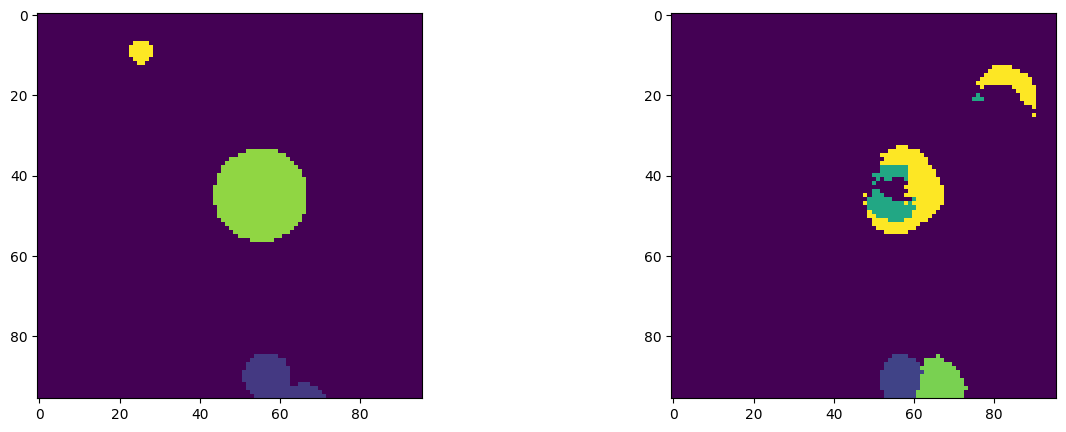

In [13]:
with torch.no_grad():
    val_data = list(val_loader)[0]
    val_inputs = val_data["image"].to(device)
    val_labels = val_data["label"].to(device)
    val_outputs = model(val_inputs)
    metric_val_outputs = [AsDiscrete(argmax=True)(i) for i in decollate_batch(val_outputs)]
    metric_val_labels = [AsDiscrete()(i) for i in decollate_batch(val_labels)]

plt.figure(figsize=(15, 5))
z = 50

label = metric_val_labels[0].to("cpu")
output = metric_val_outputs[0].to("cpu")

print(label.shape, output.shape)

plt.subplot(1, 2, 1)
plt.imshow(label[0][z], cmap='viridis')
plt.subplot(1, 2, 2)
plt.imshow(output[0][z], cmap='viridis')
plt.show()